# Median and Means

## Overview

A solid grasp of the fundamentals of statistics along with an intuitive understanding of how different measures tend to be more robust is key to our goal of learning and applying machine learning to real world problems.  This lab will help you to better understand some of the descriptive statistical measures that are commonly used.

## Goals

By the end of this lab, you should be able to:

 * Clearly understand the differences between the mean and median measures
 * Know how to generate a weighted mean
 * Know how to generate a trimmed mean
 
## Estimated Time: 30 - 45 minutes

# <img src="../images/task.png" width=20 height=20> Task 1.1

Please use the next cell to import both the Pandas and NumPy libraries.  Import NumPy as `np` and Pandas as `pd`.

In [1]:
import pandas as pd
import numpy as np
import os

In this exercise we are going to be working with a dataset created by BackBlaze.  BackBlaze is a cloud storage provider.  One of the things that they do every quarter is release raw information regarding all of the different brands and types of hard drives that are in use within their infrastructure.  The aspect of this that is useful for our field is that they provide failure data.

Since BackBlaze likely purchases, uses, and discards more hard drives than your organization does in any twelve month period, the data that they release can be used by us to make reliability predictions and purchasing decisions.  These can serve to assure availability and integrity of our mission critical data.

There are a variety of compiled reports that are released, but we are interested in working with the raw data.  Why?  Primarily because we want to experiment a bit with the statistics tools that we have been learning about.  Our interest goes beyond this, however.

Certainly, we could simply consume the compiled statistics in the quarterly report that BackBlaze releases.  This, however, would not help us to know how to analyze data within our own organization.  Additionally, we might be interested in looking for correlations specific to our organization that are not present in the summarized reports.

# <img src="../images/task.png" width=20 height=20> Task 1.2

All of the data that we will work with is located in the directory `../data/Day 2/BackBlaze/data_Q4_2020` in a series of CSV files.  Use the following cell to create a list of all of the CSV files so that we can load them later.

In [2]:
def get_file_list(starting_directory):
    final_list = list()
    files = os.listdir(starting_directory)
    for file in files:
        file_name = os.path.join(starting_directory, file)
        if os.path.isdir(file_name):
            final_list = final_list + get_file_list(file_name)
        else:
            final_list.append(file_name)
    return final_list


In [5]:
# there was issues with loading the data so this fixed it
directory = "../data/Day 2/"
all_files = list()
for file in os.listdir(directory):
    path = os.path.join(directory, file)
    all_files.append(path)

In [6]:
print(len(all_files))
print(all_files[:5], all_files[-5:])


92
['../data/Day 2/2020-12-18.csv', '../data/Day 2/2020-10-25.csv', '../data/Day 2/2020-10-26.csv', '../data/Day 2/2020-11-08.csv', '../data/Day 2/2020-11-10.csv'] ['../data/Day 2/2020-12-31.csv', '../data/Day 2/2020-12-26.csv', '../data/Day 2/2020-12-19.csv', '../data/Day 2/2020-12-10.csv', '../data/Day 2/2020-12-16.csv']


We have included the documentation for the BackBlaze data in the zip file in that same directory.  Rather than reading the documentation, let's just have a look at some of the data.  We will use Pandas to do this.

Pandas provides the `read_csv()` convenience function on the class.  Here is the associated help output:

```
Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports optionally iterating or breaking of the file
    into chunks.
    
    Additional help can be found in the online docs for
    `IO Tools <https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html>`_.
    
    Parameters
    ----------
    filepath_or_buffer : str, path object or file-like object
        Any valid string path is acceptable. The string could be a URL. Valid
        URL schemes include http, ftp, s3, gs, and file. For file URLs, a host is
        expected. A local file could be: file://localhost/path/to/table.csv.
    
        If you want to pass in a path object, pandas accepts any ``os.PathLike``.
    
        By file-like object, we refer to objects with a ``read()`` method, such as
        a file handler (e.g. via builtin ``open`` function) or ``StringIO``.
    sep : str, default ','
        Delimiter to use. If sep is None, the C engine cannot automatically detect
        the separator, but the Python parsing engine can, meaning the latter will
        be used and automatically detect the separator by Python's builtin sniffer
        tool, ``csv.Sniffer``. In addition, separators longer than 1 character and
        different from ``'\s+'`` will be interpreted as regular expressions and
        will also force the use of the Python parsing engine. Note that regex
        delimiters are prone to ignoring quoted data. Regex example: ``'\r\t'``.
    delimiter : str, default ``None``
        Alias for sep.
    header : int, list of int, default 'infer'
        Row number(s) to use as the column names, and the start of the
        data.  Default behavior is to infer the column names: if no names
        are passed the behavior is identical to ``header=0`` and column
        names are inferred from the first line of the file, if column
        names are passed explicitly then the behavior is identical to
        ``header=None``. Explicitly pass ``header=0`` to be able to
        replace existing names. The header can be a list of integers that
        specify row locations for a multi-index on the columns
        e.g. [0,1,3]. Intervening rows that are not specified will be
        skipped (e.g. 2 in this example is skipped). Note that this
        parameter ignores commented lines and empty lines if
        ``skip_blank_lines=True``, so ``header=0`` denotes the first line of
        data rather than the first line of the file.
    names : array-like, optional
        List of column names to use. If the file contains a header row,
        then you should explicitly pass ``header=0`` to override the column names.
        Duplicates in this list are not allowed.
    index_col : int, str, sequence of int / str, or False, default ``None``
      Column(s) to use as the row labels of the ``DataFrame``, either given as
      string name or column index. If a sequence of int / str is given, a
      MultiIndex is used.
    
      Note: ``index_col=False`` can be used to force pandas to *not* use the first
      column as the index, e.g. when you have a malformed file with delimiters at
      the end of each line.
    usecols : list-like or callable, optional
        Return a subset of the columns. If list-like, all elements must either
        be positional (i.e. integer indices into the document columns) or strings
        that correspond to column names provided either by the user in `names` or
        inferred from the document header row(s). For example, a valid list-like
        `usecols` parameter would be ``[0, 1, 2]`` or ``['foo', 'bar', 'baz']``.
        Element order is ignored, so ``usecols=[0, 1]`` is the same as ``[1, 0]``.
        To instantiate a DataFrame from ``data`` with element order preserved use
        ``pd.read_csv(data, usecols=['foo', 'bar'])[['foo', 'bar']]`` for columns
        in ``['foo', 'bar']`` order or
        ``pd.read_csv(data, usecols=['foo', 'bar'])[['bar', 'foo']]``
        for ``['bar', 'foo']`` order.
    
        If callable, the callable function will be evaluated against the column
        names, returning names where the callable function evaluates to True. An
        example of a valid callable argument would be ``lambda x: x.upper() in
        ['AAA', 'BBB', 'DDD']``. Using this parameter results in much faster
        parsing time and lower memory usage.
    squeeze : bool, default False
        If the parsed data only contains one column then return a Series.
    prefix : str, optional
        Prefix to add to column numbers when no header, e.g. 'X' for X0, X1, ...
    mangle_dupe_cols : bool, default True
        Duplicate columns will be specified as 'X', 'X.1', ...'X.N', rather than
        'X'...'X'. Passing in False will cause data to be overwritten if there
        are duplicate names in the columns.
    dtype : Type name or dict of column -> type, optional
        Data type for data or columns. E.g. {'a': np.float64, 'b': np.int32,
        'c': 'Int64'}
        Use `str` or `object` together with suitable `na_values` settings
        to preserve and not interpret dtype.
        If converters are specified, they will be applied INSTEAD
        of dtype conversion.
    engine : {'c', 'python'}, optional
        Parser engine to use. The C engine is faster while the python engine is
        currently more feature-complete.
    converters : dict, optional
        Dict of functions for converting values in certain columns. Keys can either
        be integers or column labels.
    true_values : list, optional
        Values to consider as True.
    false_values : list, optional
        Values to consider as False.
    skipinitialspace : bool, default False
        Skip spaces after delimiter.
    skiprows : list-like, int or callable, optional
        Line numbers to skip (0-indexed) or number of lines to skip (int)
        at the start of the file.
    
        If callable, the callable function will be evaluated against the row
        indices, returning True if the row should be skipped and False otherwise.
        An example of a valid callable argument would be ``lambda x: x in [0, 2]``.
    skipfooter : int, default 0
        Number of lines at bottom of file to skip (Unsupported with engine='c').
    nrows : int, optional
        Number of rows of file to read. Useful for reading pieces of large files.
    na_values : scalar, str, list-like, or dict, optional
        Additional strings to recognize as NA/NaN. If dict passed, specific
        per-column NA values.  By default the following values are interpreted as
        NaN: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
        '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a',
        'nan', 'null'.
    keep_default_na : bool, default True
        Whether or not to include the default NaN values when parsing the data.
        Depending on whether `na_values` is passed in, the behavior is as follows:
    
        * If `keep_default_na` is True, and `na_values` are specified, `na_values`
          is appended to the default NaN values used for parsing.
        * If `keep_default_na` is True, and `na_values` are not specified, only
          the default NaN values are used for parsing.
        * If `keep_default_na` is False, and `na_values` are specified, only
          the NaN values specified `na_values` are used for parsing.
        * If `keep_default_na` is False, and `na_values` are not specified, no
          strings will be parsed as NaN.
    
        Note that if `na_filter` is passed in as False, the `keep_default_na` and
        `na_values` parameters will be ignored.
    na_filter : bool, default True
        Detect missing value markers (empty strings and the value of na_values). In
        data without any NAs, passing na_filter=False can improve the performance
        of reading a large file.
    verbose : bool, default False
        Indicate number of NA values placed in non-numeric columns.
    skip_blank_lines : bool, default True
        If True, skip over blank lines rather than interpreting as NaN values.
    parse_dates : bool or list of int or names or list of lists or dict, default False
        The behavior is as follows:
    
        * boolean. If True -> try parsing the index.
        * list of int or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3
          each as a separate date column.
        * list of lists. e.g.  If [[1, 3]] -> combine columns 1 and 3 and parse as
          a single date column.
        * dict, e.g. {'foo' : [1, 3]} -> parse columns 1, 3 as date and call
          result 'foo'
    
        If a column or index cannot be represented as an array of datetimes,
        say because of an unparseable value or a mixture of timezones, the column
        or index will be returned unaltered as an object data type. For
        non-standard datetime parsing, use ``pd.to_datetime`` after
        ``pd.read_csv``. To parse an index or column with a mixture of timezones,
        specify ``date_parser`` to be a partially-applied
        :func:`pandas.to_datetime` with ``utc=True``. See
        :ref:`io.csv.mixed_timezones` for more.
    
        Note: A fast-path exists for iso8601-formatted dates.
    infer_datetime_format : bool, default False
        If True and `parse_dates` is enabled, pandas will attempt to infer the
        format of the datetime strings in the columns, and if it can be inferred,
        switch to a faster method of parsing them. In some cases this can increase
        the parsing speed by 5-10x.
    keep_date_col : bool, default False
        If True and `parse_dates` specifies combining multiple columns then
        keep the original columns.
    date_parser : function, optional
        Function to use for converting a sequence of string columns to an array of
        datetime instances. The default uses ``dateutil.parser.parser`` to do the
        conversion. Pandas will try to call `date_parser` in three different ways,
        advancing to the next if an exception occurs: 1) Pass one or more arrays
        (as defined by `parse_dates`) as arguments; 2) concatenate (row-wise) the
        string values from the columns defined by `parse_dates` into a single array
        and pass that; and 3) call `date_parser` once for each row using one or
        more strings (corresponding to the columns defined by `parse_dates`) as
        arguments.
    dayfirst : bool, default False
        DD/MM format dates, international and European format.
    cache_dates : bool, default True
        If True, use a cache of unique, converted dates to apply the datetime
        conversion. May produce significant speed-up when parsing duplicate
        date strings, especially ones with timezone offsets.
    
        .. versionadded:: 0.25.0
    iterator : bool, default False
        Return TextFileReader object for iteration or getting chunks with
        ``get_chunk()``.
    chunksize : int, optional
        Return TextFileReader object for iteration.
        See the `IO Tools docs
        <https://pandas.pydata.org/pandas-docs/stable/io.html#io-chunking>`_
        for more information on ``iterator`` and ``chunksize``.
    compression : {'infer', 'gzip', 'bz2', 'zip', 'xz', None}, default 'infer'
        For on-the-fly decompression of on-disk data. If 'infer' and
        `filepath_or_buffer` is path-like, then detect compression from the
        following extensions: '.gz', '.bz2', '.zip', or '.xz' (otherwise no
        decompression). If using 'zip', the ZIP file must contain only one data
        file to be read in. Set to None for no decompression.
    thousands : str, optional
        Thousands separator.
    decimal : str, default '.'
        Character to recognize as decimal point (e.g. use ',' for European data).
    lineterminator : str (length 1), optional
        Character to break file into lines. Only valid with C parser.
    quotechar : str (length 1), optional
        The character used to denote the start and end of a quoted item. Quoted
        items can include the delimiter and it will be ignored.
    quoting : int or csv.QUOTE_* instance, default 0
        Control field quoting behavior per ``csv.QUOTE_*`` constants. Use one of
        QUOTE_MINIMAL (0), QUOTE_ALL (1), QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).
    doublequote : bool, default ``True``
       When quotechar is specified and quoting is not ``QUOTE_NONE``, indicate
       whether or not to interpret two consecutive quotechar elements INSIDE a
       field as a single ``quotechar`` element.
    escapechar : str (length 1), optional
        One-character string used to escape other characters.
    comment : str, optional
        Indicates remainder of line should not be parsed. If found at the beginning
        of a line, the line will be ignored altogether. This parameter must be a
        single character. Like empty lines (as long as ``skip_blank_lines=True``),
        fully commented lines are ignored by the parameter `header` but not by
        `skiprows`. For example, if ``comment='#'``, parsing
        ``#empty\na,b,c\n1,2,3`` with ``header=0`` will result in 'a,b,c' being
        treated as the header.
    encoding : str, optional
        Encoding to use for UTF when reading/writing (ex. 'utf-8'). `List of Python
        standard encodings
        <https://docs.python.org/3/library/codecs.html#standard-encodings>`_ .
    dialect : str or csv.Dialect, optional
        If provided, this parameter will override values (default or not) for the
        following parameters: `delimiter`, `doublequote`, `escapechar`,
        `skipinitialspace`, `quotechar`, and `quoting`. If it is necessary to
        override values, a ParserWarning will be issued. See csv.Dialect
        documentation for more details.
    error_bad_lines : bool, default True
        Lines with too many fields (e.g. a csv line with too many commas) will by
        default cause an exception to be raised, and no DataFrame will be returned.
        If False, then these "bad lines" will dropped from the DataFrame that is
        returned.
    warn_bad_lines : bool, default True
        If error_bad_lines is False, and warn_bad_lines is True, a warning for each
        "bad line" will be output.
    delim_whitespace : bool, default False
        Specifies whether or not whitespace (e.g. ``' '`` or ``'    '``) will be
        used as the sep. Equivalent to setting ``sep='\s+'``. If this option
        is set to True, nothing should be passed in for the ``delimiter``
        parameter.
    low_memory : bool, default True
        Internally process the file in chunks, resulting in lower memory use
        while parsing, but possibly mixed type inference.  To ensure no mixed
        types either set False, or specify the type with the `dtype` parameter.
        Note that the entire file is read into a single DataFrame regardless,
        use the `chunksize` or `iterator` parameter to return the data in chunks.
        (Only valid with C parser).
    memory_map : bool, default False
        If a filepath is provided for `filepath_or_buffer`, map the file object
        directly onto memory and access the data directly from there. Using this
        option can improve performance because there is no longer any I/O overhead.
    float_precision : str, optional
        Specifies which converter the C engine should use for floating-point
        values. The options are `None` for the ordinary converter,
        `high` for the high-precision converter, and `round_trip` for the
        round-trip converter.
    
    Returns
    -------
    DataFrame or TextParser
        A comma-separated values (csv) file is returned as two-dimensional
        data structure with labeled axes.
    
    See Also
    --------
    DataFrame.to_csv : Write DataFrame to a comma-separated values (csv) file.
    read_csv : Read a comma-separated values (csv) file into DataFrame.
    read_fwf : Read a table of fixed-width formatted lines into DataFrame.
    
    Examples
    --------
    >>> pd.read_csv('data.csv')  # doctest: +SKIP
```
    

# <img src="../images/task.png" width=20 height=20> Task 1.3

In the following cell, use Pandas to read the first CSV file from the list of files that you have gathered.  Display this data as a dataframe. 

In [7]:
df = pd.read_csv(all_files[0])
print(df)

              date   serial_number                 model  capacity_bytes  \
0       2020-12-18        ZLW0EGC6         ST12000NM001G  12000138625024   
1       2020-12-18        Z305B2QN           ST4000DM000   4000787030016   
2       2020-12-18        ZLW0C6NE         ST12000NM001G  12000138625024   
3       2020-12-18        ZJV0XJQ3         ST12000NM0007  12000138625024   
4       2020-12-18        ZLW18MKT         ST14000NM001G  14000519643136   
...            ...             ...                   ...             ...   
164269  2020-12-18        ZJV2ESXT         ST12000NM0007  12000138625024   
164270  2020-12-18        ZA13ZBCT           ST8000DM002   8001563222016   
164271  2020-12-18  PL1331LAHGD9NH  HGST HMS5C4040BLE640   4000787030016   
164272  2020-12-18  PL2331LAHDS4TJ  HGST HMS5C4040BLE640   4000787030016   
164273  2020-12-18        X0GEV9EC   WDC WUH721414ALE6L4  14000519643136   

        failure  smart_1_normalized  smart_1_raw  smart_2_normalized  \
0             0

The CSV files take up more than 4 gigabytes of space.  Loading all of that data into memory is possible, but it would be better to load only what we need.  We will deal with datasets later in the class that have a great deal more data, so we should really start out as we mean to go on and be memory-conscious from the beginning.

The `read_csv()` helper function includes an option that allows us to specify the set of columns that we wish to load:

```
usecols : list-like or callable, optional
        Return a subset of the columns. If list-like, all elements must either
        be positional (i.e. integer indices into the document columns) or strings
        that correspond to column names provided either by the user in `names` or
        inferred from the document header row(s). For example, a valid list-like
        `usecols` parameter would be ``[0, 1, 2]`` or ``['foo', 'bar', 'baz']``.
        Element order is ignored, so ``usecols=[0, 1]`` is the same as ``[1, 0]``.
        To instantiate a DataFrame from ``data`` with element order preserved use
        ``pd.read_csv(data, usecols=['foo', 'bar'])[['foo', 'bar']]`` for columns
        in ``['foo', 'bar']`` order or
        ``pd.read_csv(data, usecols=['foo', 'bar'])[['bar', 'foo']]``
        for ``['bar', 'foo']`` order.
    
        If callable, the callable function will be evaluated against the column
        names, returning names where the callable function evaluates to True. An
        example of a valid callable argument would be ``lambda x: x.upper() in
        ['AAA', 'BBB', 'DDD']``. Using this parameter results in much faster
        parsing time and lower memory usage.
```        

While we can refer to the dataframe above to find the column names, we can also view them directly.

# <img src="../images/task.png" width=20 height=20> Task 1.4

The names of the columns in a dataframe are stored in the `columns` attribute of the dataframe.  Iterate over this list and print out the names of all of the columns in the dataframe.

In [8]:
print(df.columns)

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized',
       ...
       'smart_250_normalized', 'smart_250_raw', 'smart_251_normalized',
       'smart_251_raw', 'smart_252_normalized', 'smart_252_raw',
       'smart_254_normalized', 'smart_254_raw', 'smart_255_normalized',
       'smart_255_raw'],
      dtype='object', length=149)


Take a moment to think about how the data is organized.  The data is gathered from each drive each day.  This data is then stored in a CSV file.  Do we really need every row from every file?  No.  To see why not, let's take some time to work through a slightly different problem.

If we wanted to track the SMART status of a drive over time, we can use each entry for that drive from each CSV file.  Let's generate a graph of the SMART 1 status of the drive with serial number `ZLW0EGC6`.  To do this, we need to know how to select a row out of a dataframe.

Selecting a row if we know the number of the row is straightforward, though it is different from indexing an array.  This makes sense since a dataframe really isn't an array.  To access a row by index, we can use `df.loc[0]`, for instance.  We can also use `df.iloc[0]` to retrieve the first row.  What's the difference?

Since we are using these functions to extract an entire row, there is really no difference.  However, these functions also allow us to select columns of interest.  For example, if we wanted to extract the `serial_number` column for row 0, we could do it in either of the following ways:

```
df.loc[0, 'serial_number']
df.iloc[0, 1]
```

Notice that the first allows us to identify the column that we would like to extract from row 0 using the column name.  The second requires that we provide the column number.  You could view the `iloc()` function as *integer location.*

What we want to do, however, is retrieve the entire row for the serial number in question.  How can we do this?

Both the `loc` and `iloc` methods allow us to pass a list of rows.  Conveniently, we can use the following type of construct to select rows:

```
df.loc[df['smart_1_raw'] < 80, ['serial_number]]
```

This finds all rows in our data where the value of `smart_raw_1` is less than 80 and extracts the serial number from those rows.

# <img src="../images/task.png" width=20 height=20> Task 1.5

Retrieve the row from the dataframe for the drive with serial number `ZLW0EGC6`.

In [9]:
df.loc[df['serial_number']=='ZLW0EGC6']

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2020-12-18,ZLW0EGC6,ST12000NM001G,12000138625024,0,76.0,38003328.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we can extract the row of interest, let's work on retrieving all of the information available about this drive in the CSV files that are present.

# <img src="../images/task.png" width=20 height=20> Task 1.6

Iterate over the list of files.  Read in each CSV and extract the data for the drive with serial number `ZLW0EGC6`, storing the rows in a Numpy array.  Since you cannot append to a Numpy array in-place, this isn't especially efficient.  Also, you will find that the `vstack()` function is far easier to get working than the `append()` function since `append()` will flatten the arrays first, resulting in a very long single row rather than many rows.

In [10]:
this_drive = np.array([])
for file in all_files:
    df = pd.read_csv(file)
    this_row=df.loc[df['serial_number']=='ZLW0EGC6'].to_numpy()
    this_drive = df.loc[df['serial_number']=='ZLW0EGC6'].to_numpy() if this_drive.size == 0 else np.vstack((this_drive, this_row))
this_drive

array([['2020-12-18', 'ZLW0EGC6', 'ST12000NM001G', ..., nan, nan, nan],
       ['2020-10-25', 'ZLW0EGC6', 'ST12000NM001G', ..., nan, nan, nan],
       ['2020-10-26', 'ZLW0EGC6', 'ST12000NM001G', ..., nan, nan, nan],
       ...,
       ['2020-12-19', 'ZLW0EGC6', 'ST12000NM001G', ..., nan, nan, nan],
       ['2020-12-10', 'ZLW0EGC6', 'ST12000NM001G', ..., nan, nan, nan],
       ['2020-12-16', 'ZLW0EGC6', 'ST12000NM001G', ..., nan, nan, nan]],
      dtype=object)

# <img src="../images/task.png" width=20 height=20> Task 1.7

Next, let's plot this data.  The dates don't really matter for us, but it is convenient that the rows are in order of the sequence of events.  Use Matplotlib to plot the failure column and the Smart 1 raw value.

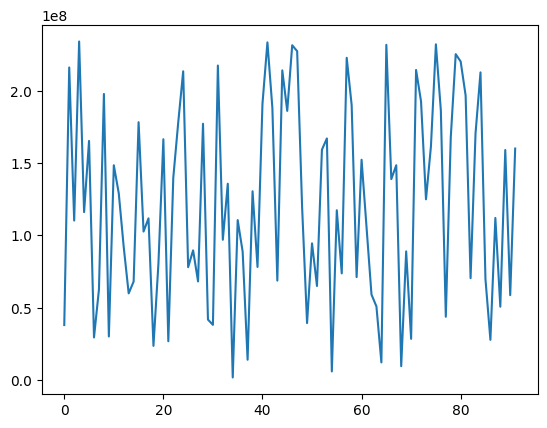

In [11]:
import matplotlib.pyplot as plt

plt.plot(this_drive[:,6])
plt.show()

The SMART 1 attribute represents the hardware read error rate.  In some drives, this value simply increases over time, tracking the total number, so it might not be very useful.  You may also find that vendors use this as a piece of structured data, so it isn't necessarily an actual magnitude of read errors, though lower values are generally better.

If you are interested in a complete list of the SMART status attributes and their meanings, you can peruse the Wikipedia article on S.M.A.R.T., which has a fairly comprehensive list.  For our purposes, let's identify just a few of these that might be intuitively indicative of pending drive failure and then see how our intuition compares to the statistics we can generate from the data.

| ID   |  Attribute Name               | High/Low |
|:----:|:-----------------------------:|:--------:|
| 1    | Read Error Rate               | Low      |
| 2    | Throughput                    | High     |
| 3    | Spinup Time                   | Low      |
| 4    | Spindle Start Count           | NA       |
| 5    | Reallocated Sectors           | Low      |
| 8    | Seek Time Performance         | High     |
| 9    | Power On Hours                | ???      |
| 10   | Spinup Retry Count            | Low      |
| 11   | Recalibration Retries         | Low      |
| 12   | Power Cycles                  | ???      |
| 13   | Soft Read Errors              | Low      |
| 22   | Helium Level                  | High     |
| 183  | Downshift or Bad Block        | Low      |
| 184  | Parity Errors Detected        | Low      |
| 187  | Uncorrectable Error Count     | Low      |
| 188  | Drive Timeouts                | 0        |
| 197  | Sectors with Remap Pending    | Low      |
| 198  | Uncorrectable Sectors         | Low      |
| 201  | Software Read Errors          | Low      |
| 250  | Read Error Count              | Low      |
| 254  | Freefall Events Detected      | Low      |

# <img src="../images/task.png" width=20 height=20> Task 1.8

Plot the following for this single drive:

* Failure status
* Read Error Rate
* Spinup Time
* Power On Hours
* Power Cycles
* Soft Read Errors
* Drive Timeouts
* Read Error Count

You should use the *normalized* values for each of these.  Normalization shifts the raw values to a common scale, allowing  us to compare values of different magnitudes or, in this case, plot them all on a single set of axes.

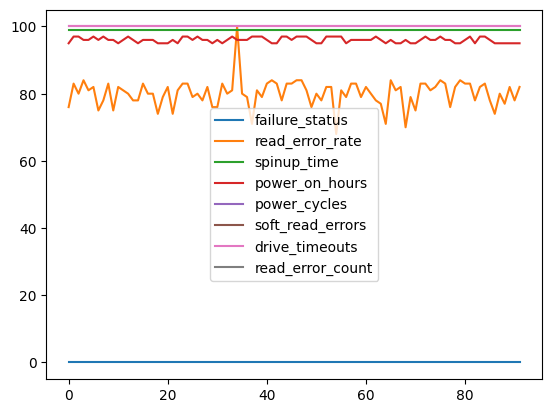

In [12]:
cols = {
    "failure_status": 4,
    "read_error_rate": 5,
    "spinup_time": 9,
    "power_on_hours": 19,
    "power_cycles": 25,
    "soft_read_errors": 27,
    "drive_timeouts": 69,
    "read_error_count": 139
}
for i in cols.values():
    plt.plot(this_drive[:, i])
plt.legend(cols.keys())
plt.show()

This seems like a handy graph to be able to create.  Let's turn it into a helper function.

# <img src="../images/task.png" width=20 height=20> Task 1.9

Create a helper function based on the last task.  The function should allow you to pass in a numpy array representing the sequential time data for a single drive.

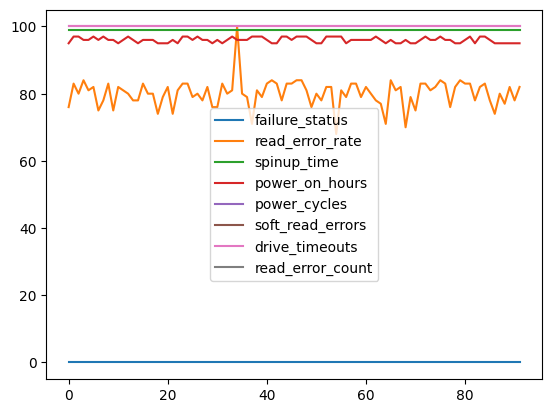

In [13]:
def plot_smart_status(df, cols):
    for i in cols.values():
        plt.plot(df[:, i])
    plt.legend(cols.keys())
    plt.show()

plot_smart_status(this_drive,cols)

Let's find drives that have failed.  Our current working hypothesis is that there are likely to be commonalities in failed drives.  Some types of failures probably occur regardless of driver manufacturer or model number.  Other failures might be specific to a particular model number.

We want to see if there are any obvious values that all failures have in common.

# <img src="../images/task.png" width=20 height=20> Task 1.10
Reread the CSV files and extract all of the rows that represent drives that failed.  Generate a scatter plot for each that indicates the values for each of the SMART status values in the function that we just defined but for each drive that is marked as failed.

In [14]:
failed_drives = np.array([])
for file in all_files:
    df = pd.read_csv(file)
    this_row=df.loc[df['failure']!=0].to_numpy()
    failed_drives = this_row if failed_drives.size == 0 else np.vstack((failed_drives, this_row))
failed_drives

array([['2020-12-18', 'ZA13ZKY2', 'ST8000DM002', ..., nan, nan, nan],
       ['2020-12-18', 'ZLW15TF1', 'ST14000NM001G', ..., nan, nan, nan],
       ['2020-12-18', 'ZA10BKHH', 'ST8000DM002', ..., nan, nan, nan],
       ...,
       ['2020-12-10', 'Z302AKAR', 'ST4000DM000', ..., nan, nan, nan],
       ['2020-12-10', '20H0A1DJF97G', 'TOSHIBA MG07ACA14TA', ..., nan,
        nan, nan],
       ['2020-12-16', 'ZHZ4XJA0', 'ST12000NM0008', ..., nan, nan, nan]],
      dtype=object)

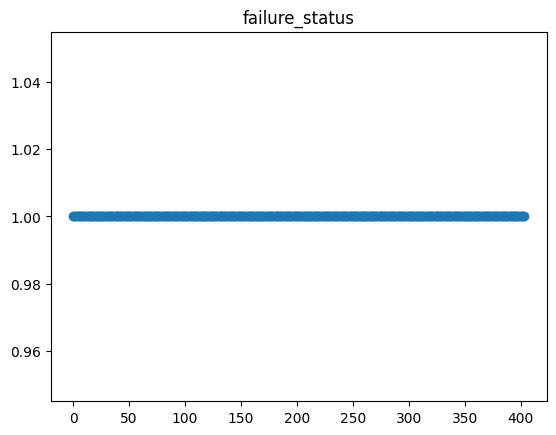

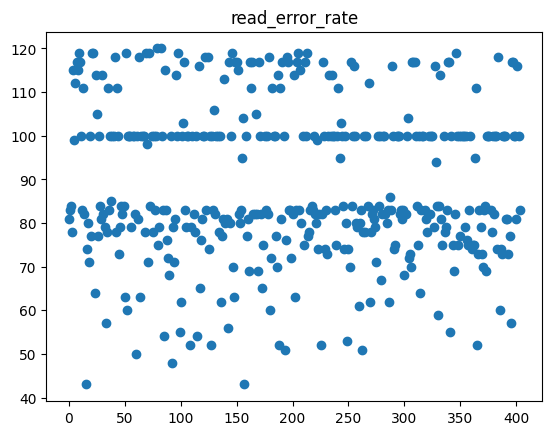

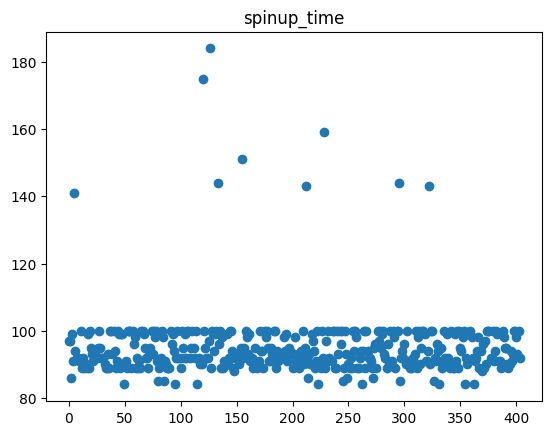

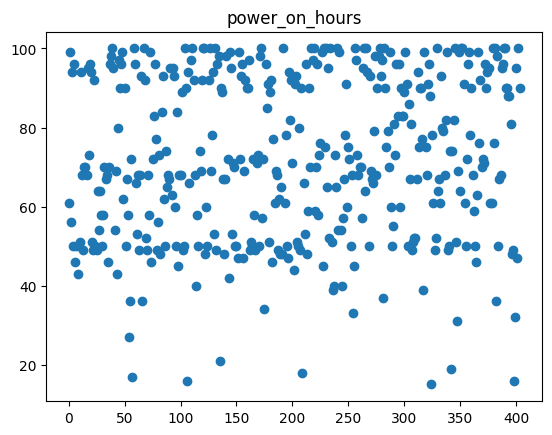

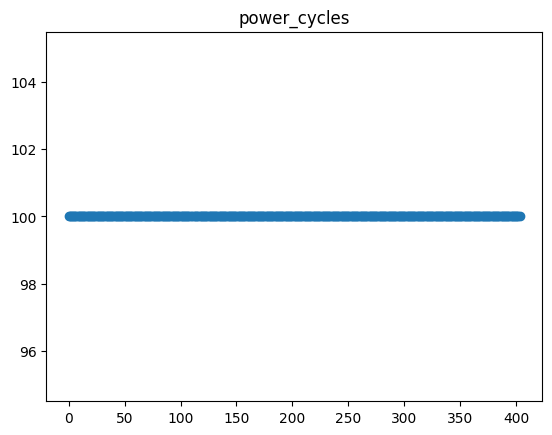

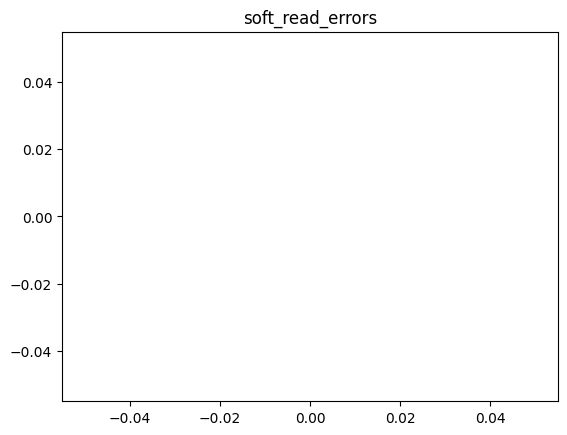

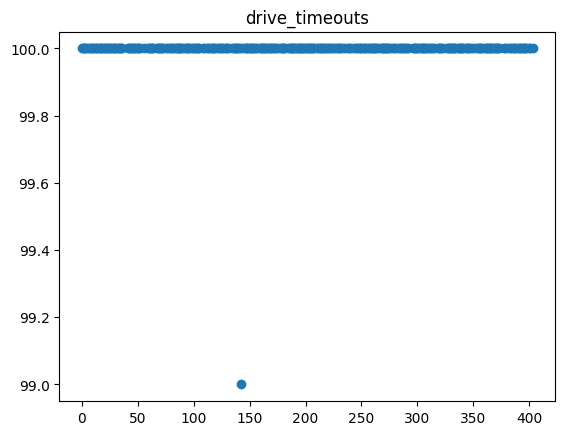

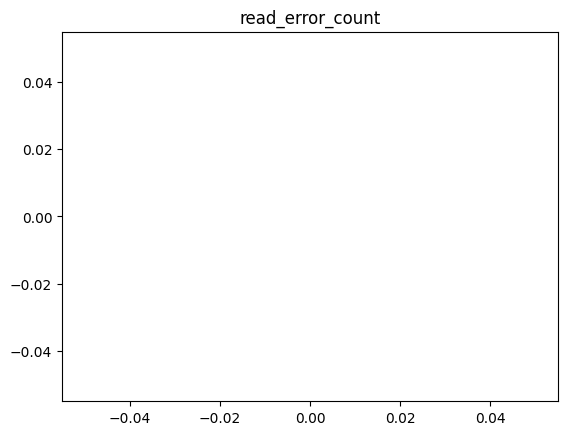

In [15]:
for legend, column in cols.items():
    plt.scatter(range(len(failed_drives)),failed_drives[:,column])
    plt.title(legend)
    plt.show()

Of all of these graphs, the drive timeouts value stands out as an obvious indicator.  However, is it possible that once the drive has failed, the drive timeouts will, of course, max out?

The spinup time data also looks promising.  Some of the values are quite high, but the majority of the normalized values are coming in around 100.  Could this be a good indicator?

The read error rate also seems to have some clear patterns to it, as does the total powered hours.

Perhaps it would be useful to view this data by model number?

# <img src="../images/task.png" width=20 height=20> Task 1.11

Use the following cells to generate the graphs above, but comparing like for like.  In other words, generate each of the above graphs for each model number where failures were seen.  You should probably refactor the graph drawing out to a function.  It might be valuable to allow for a parameter that uses the raw values rather than the normalized values.


Drive Model: HGST HMS5C4040ALE640


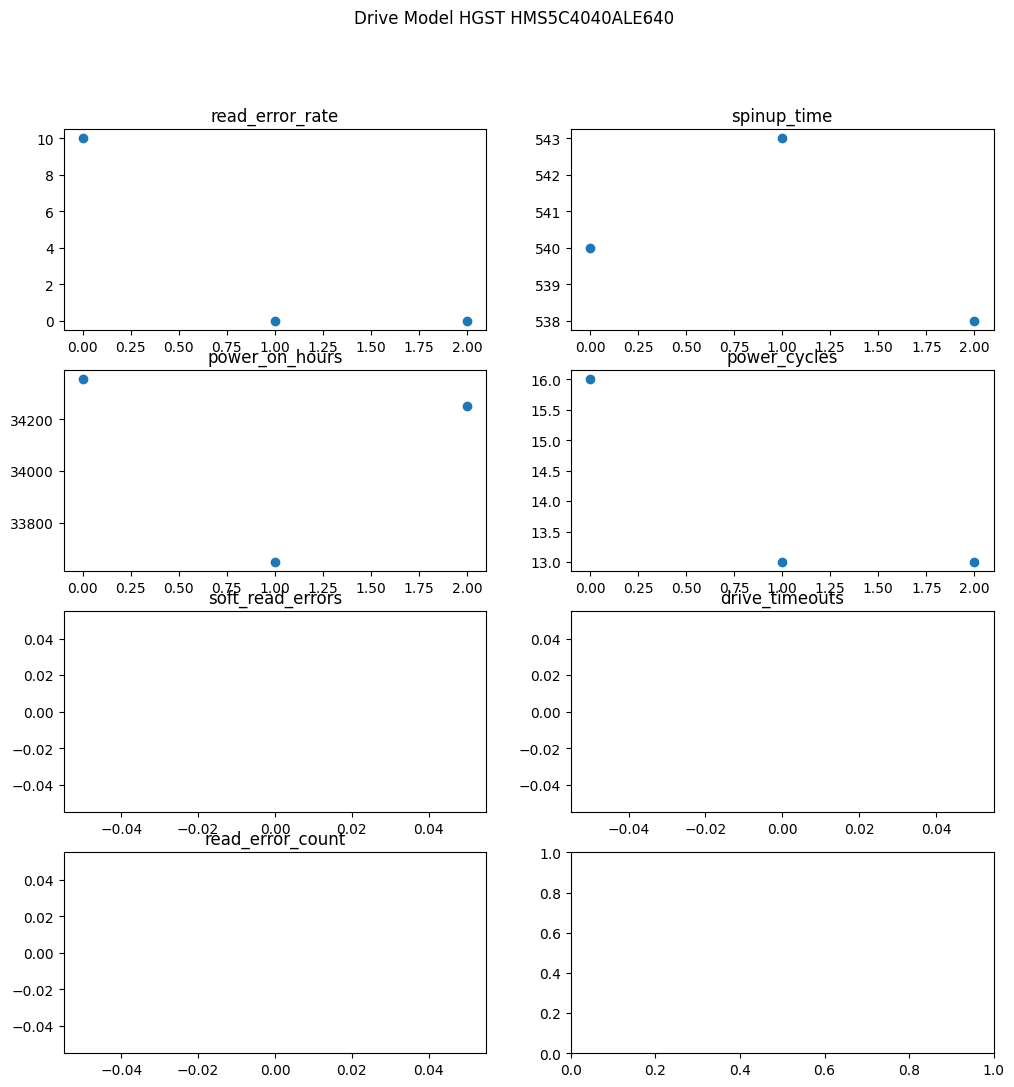

Drive Model: HGST HMS5C4040BLE640


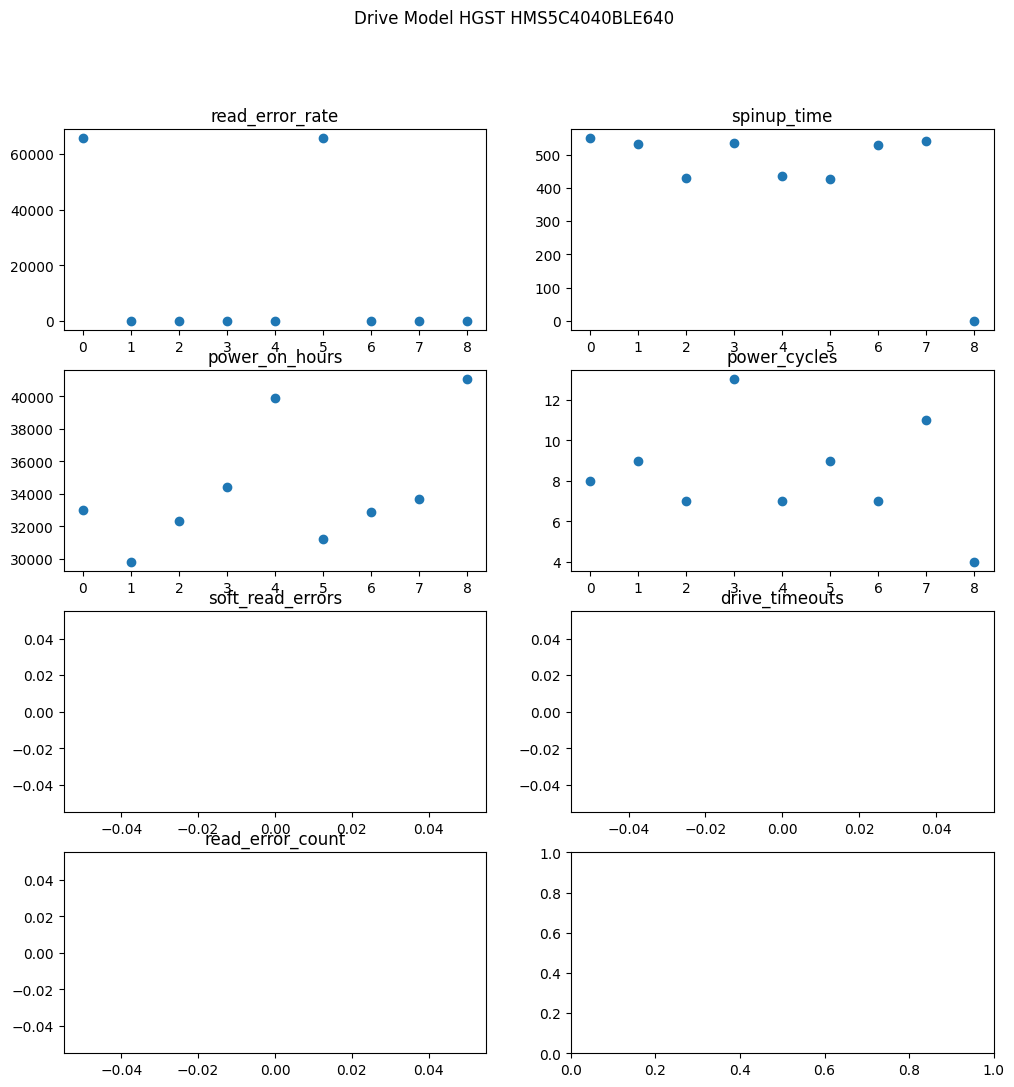

Drive Model: HGST HUH721212ALE600


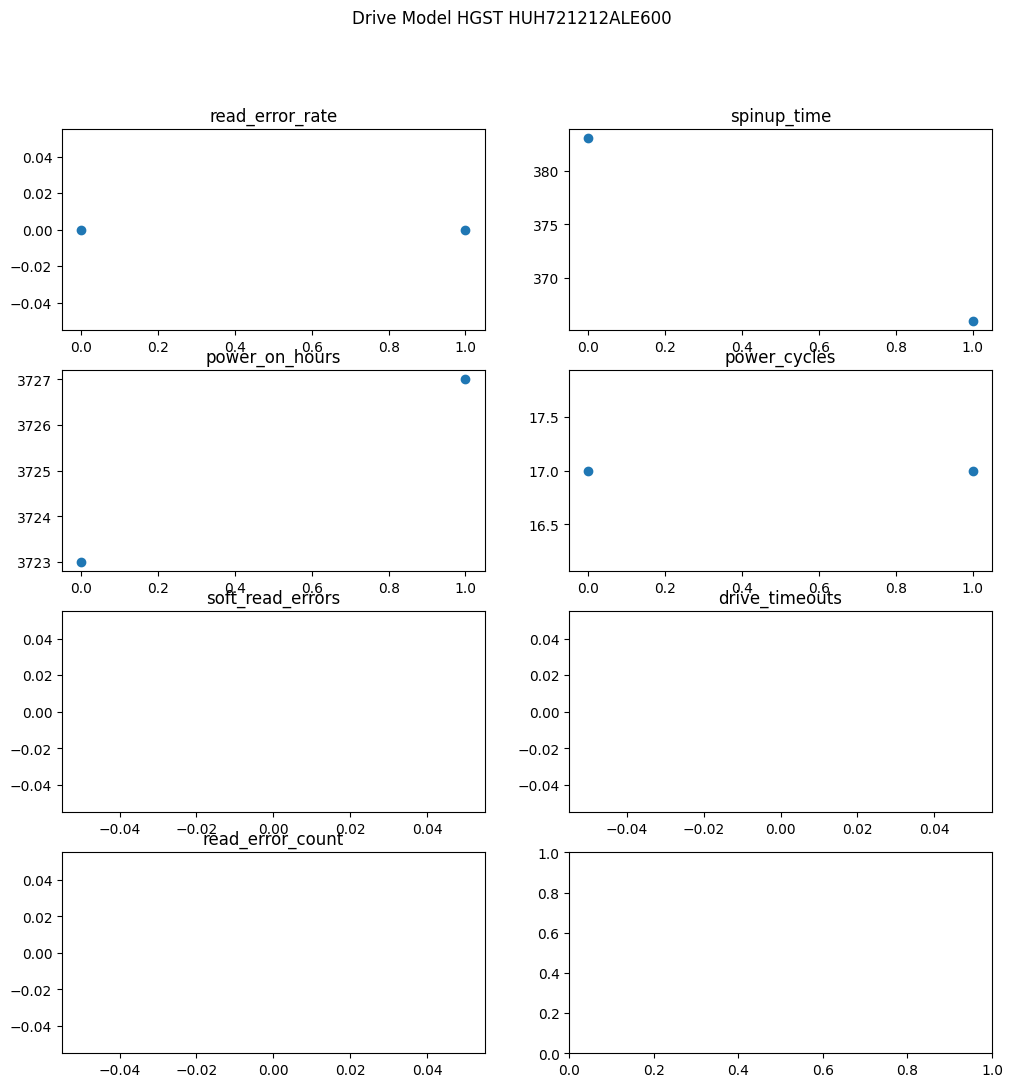

Drive Model: HGST HUH721212ALE604


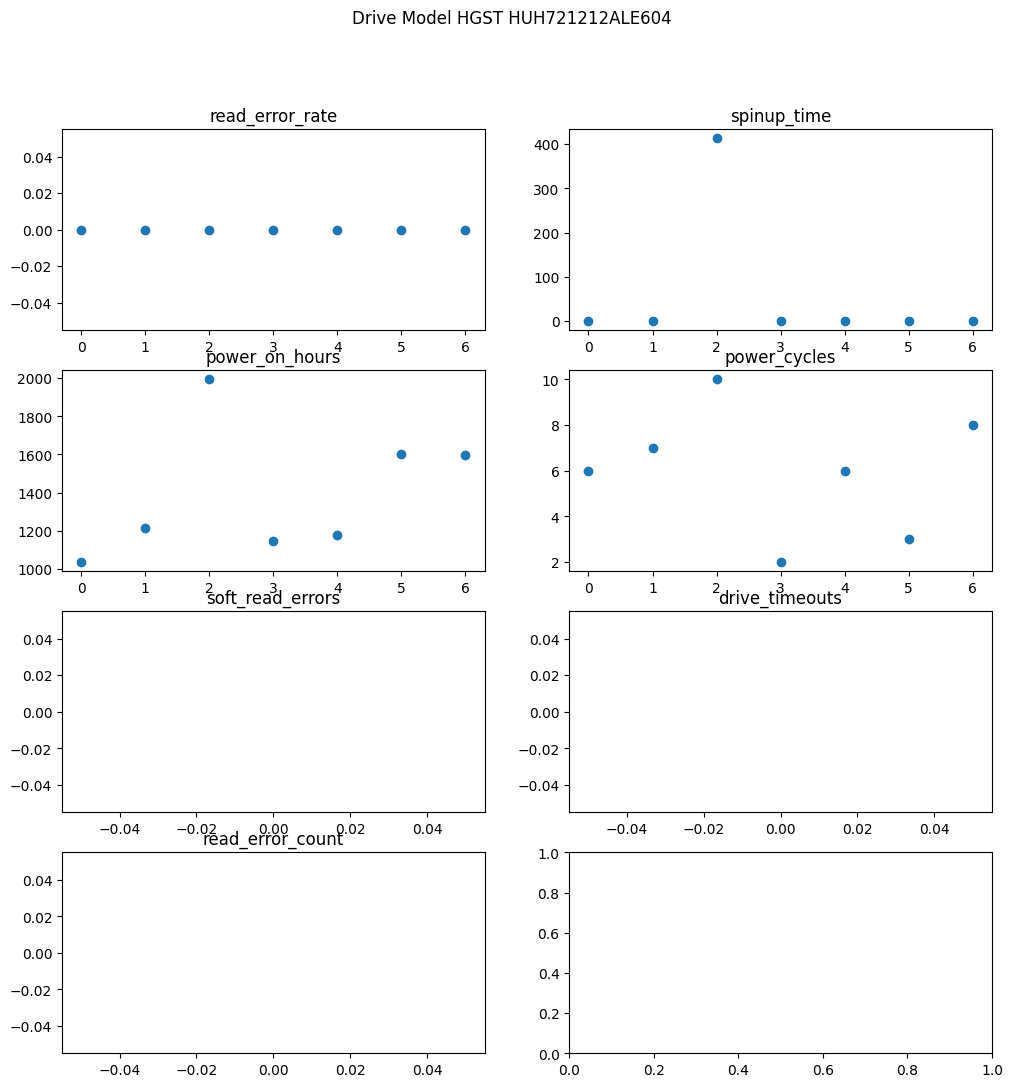

Drive Model: HGST HUH721212ALN604


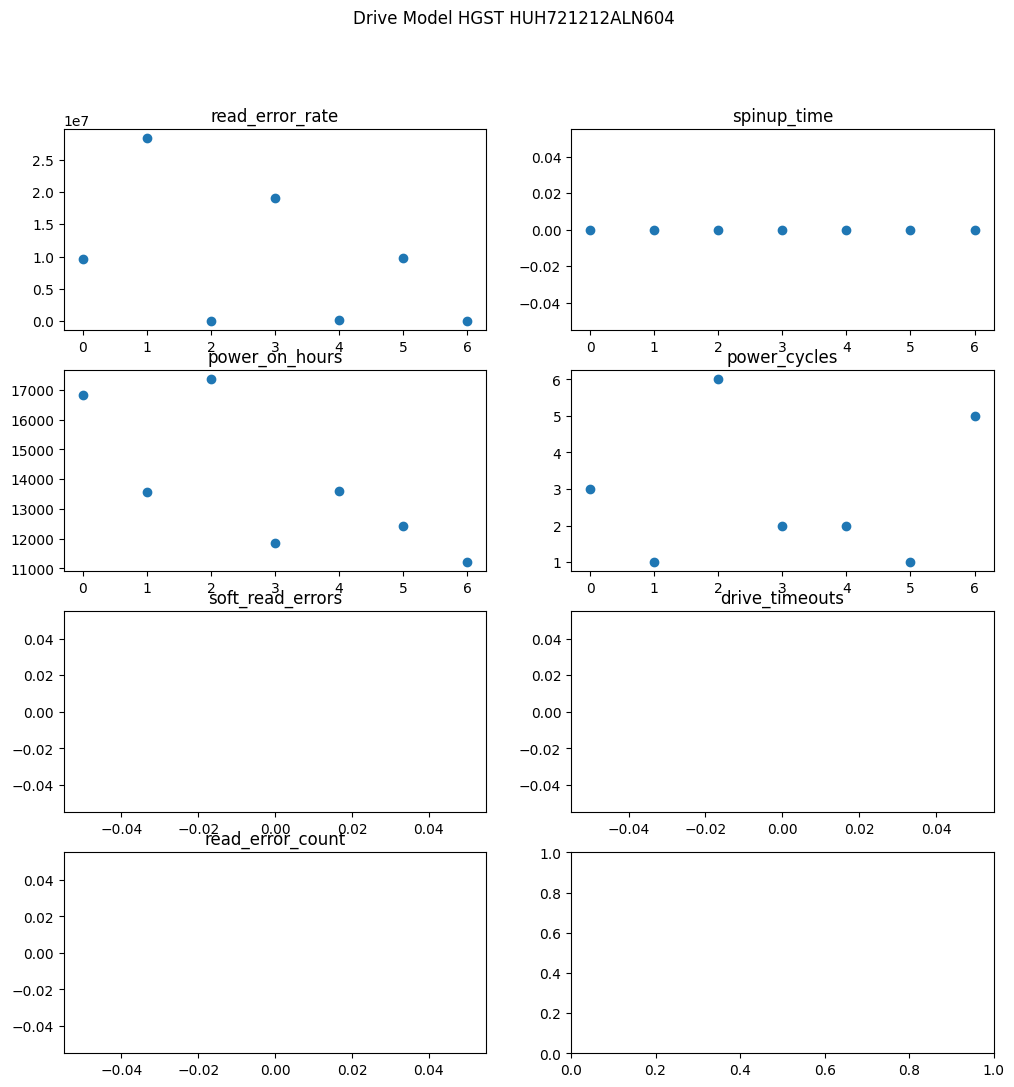

Drive Model: HGST HUH728080ALE600


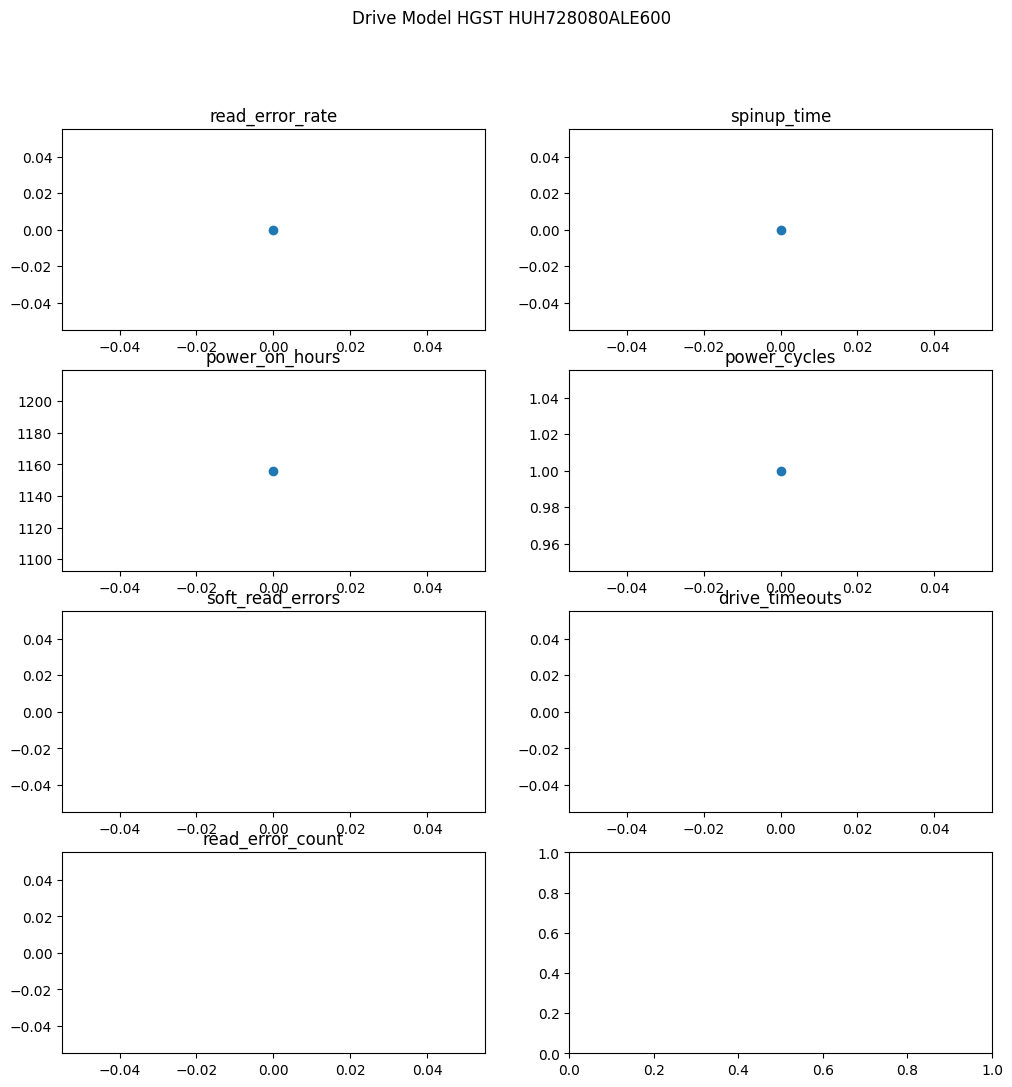

Drive Model: ST10000NM0086


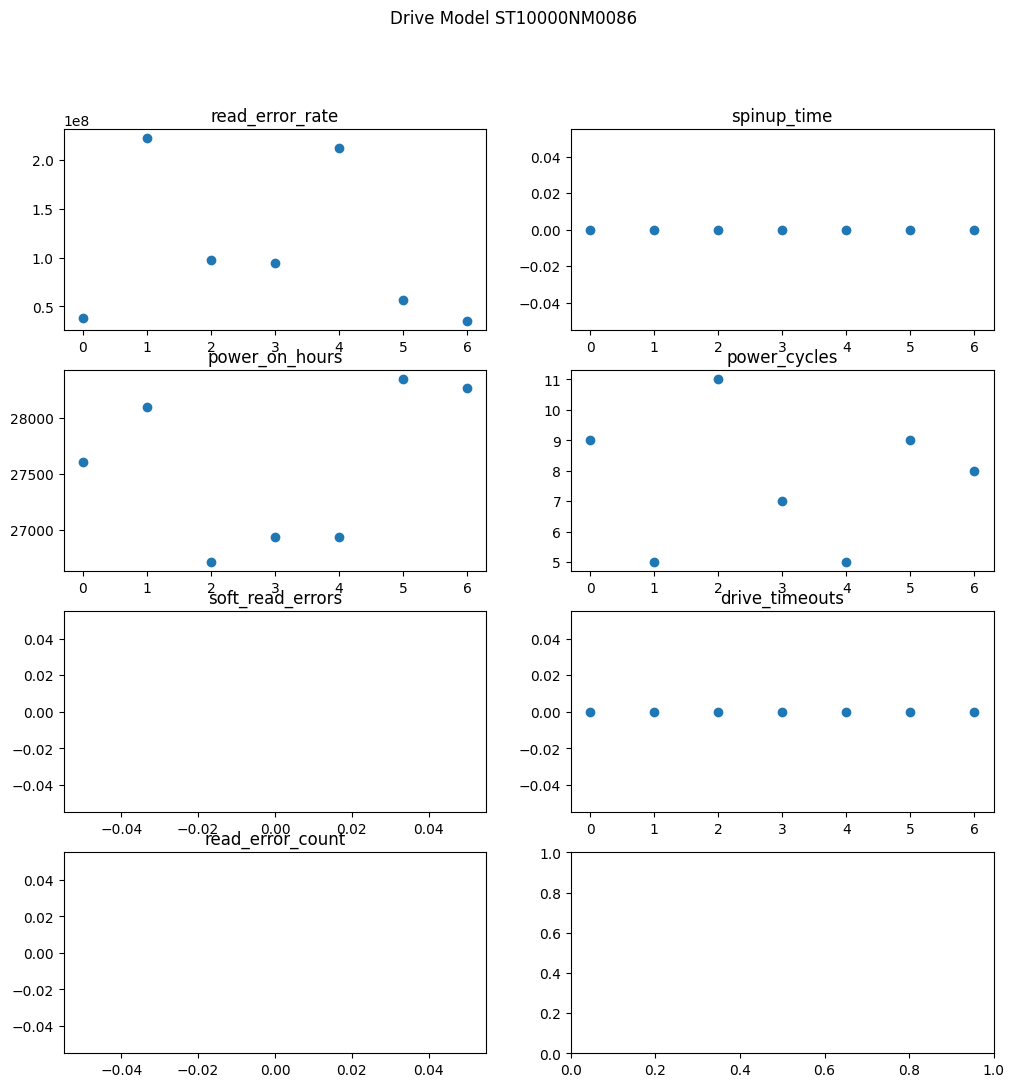

Drive Model: ST12000NM0007


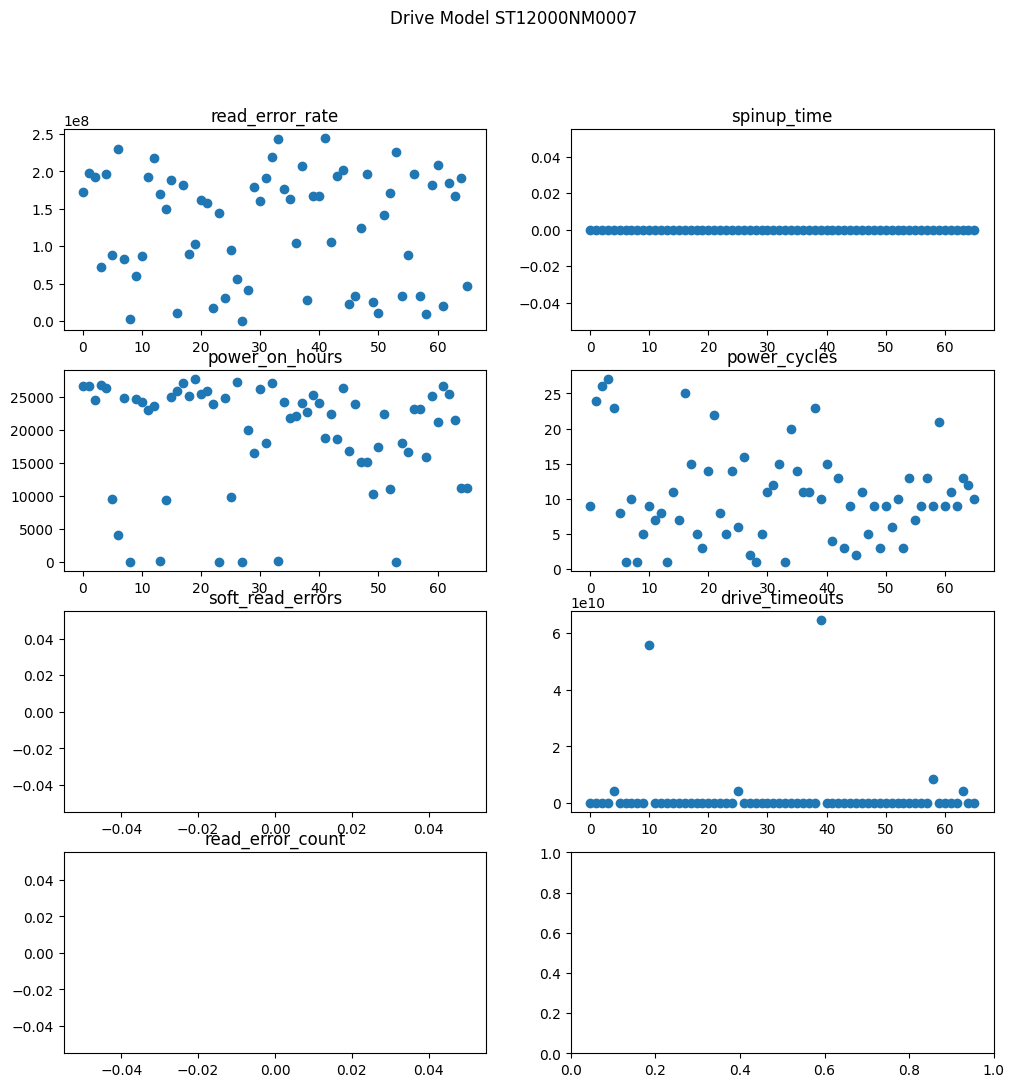

Drive Model: ST12000NM0008


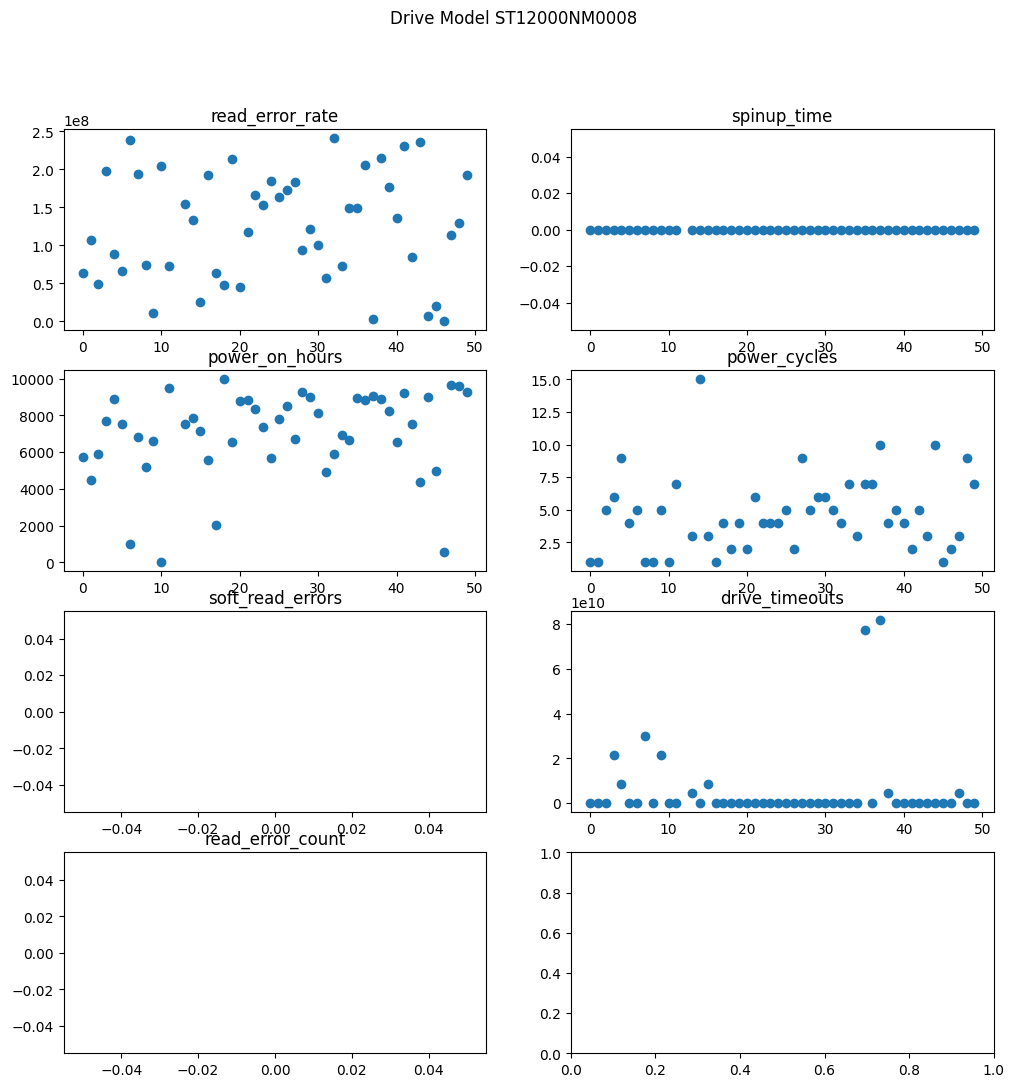

Drive Model: ST12000NM001G


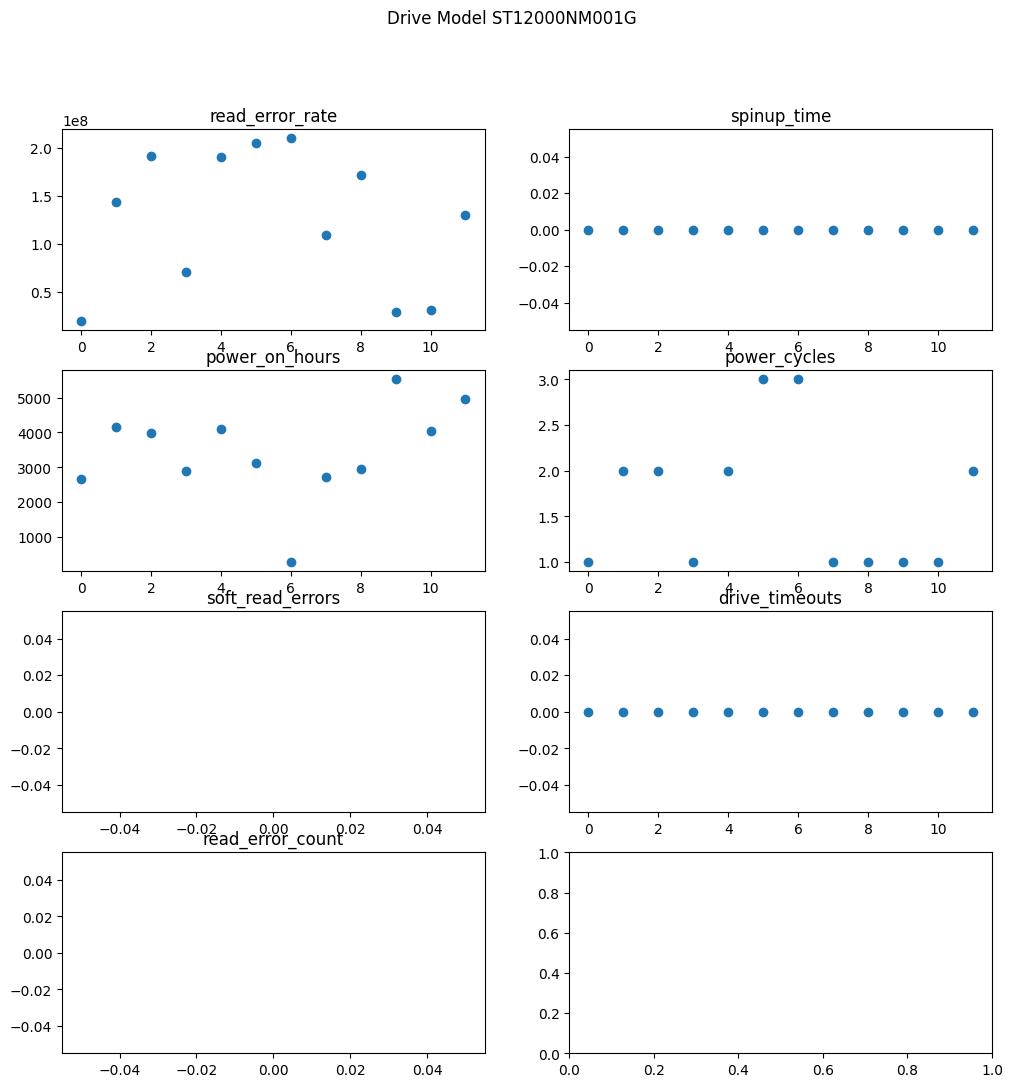

Drive Model: ST14000NM001G


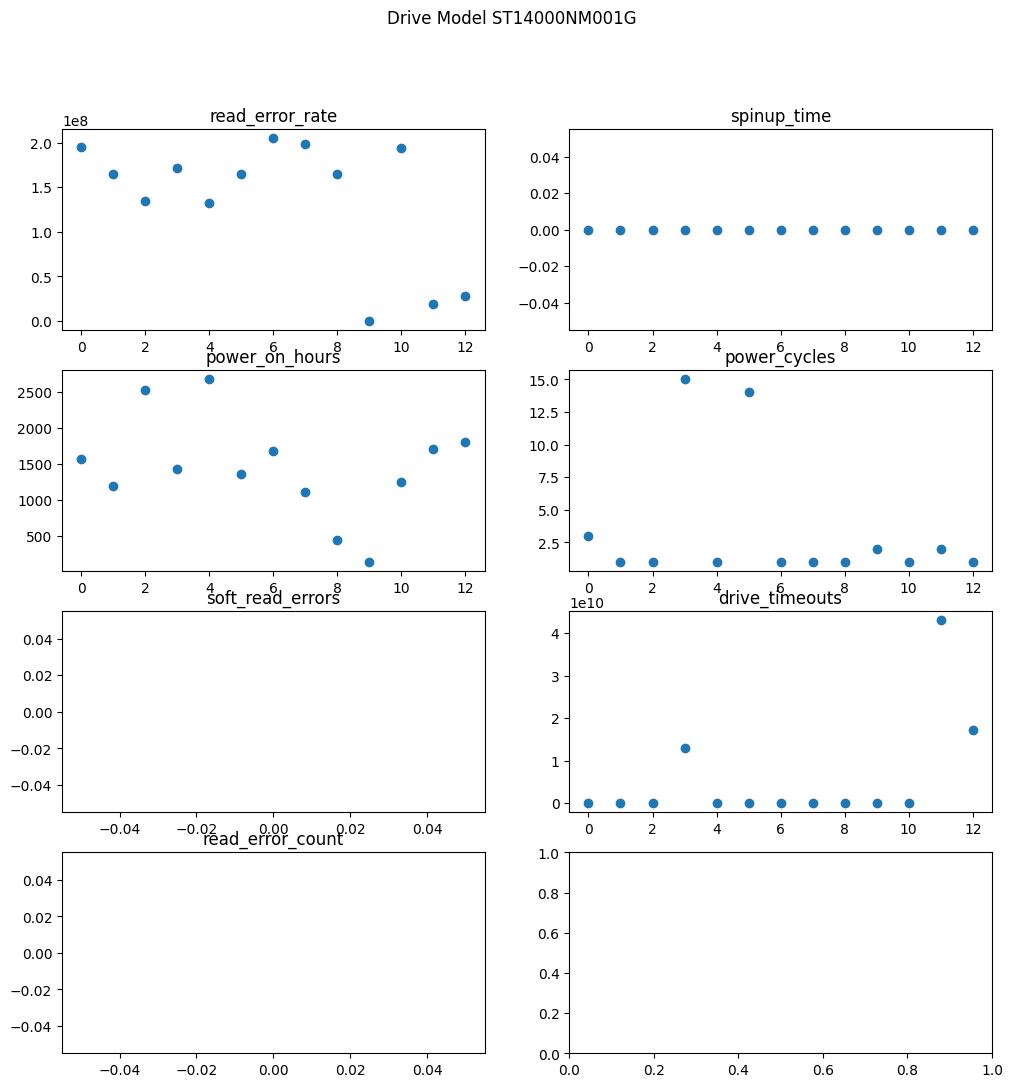

Drive Model: ST18000NM000J


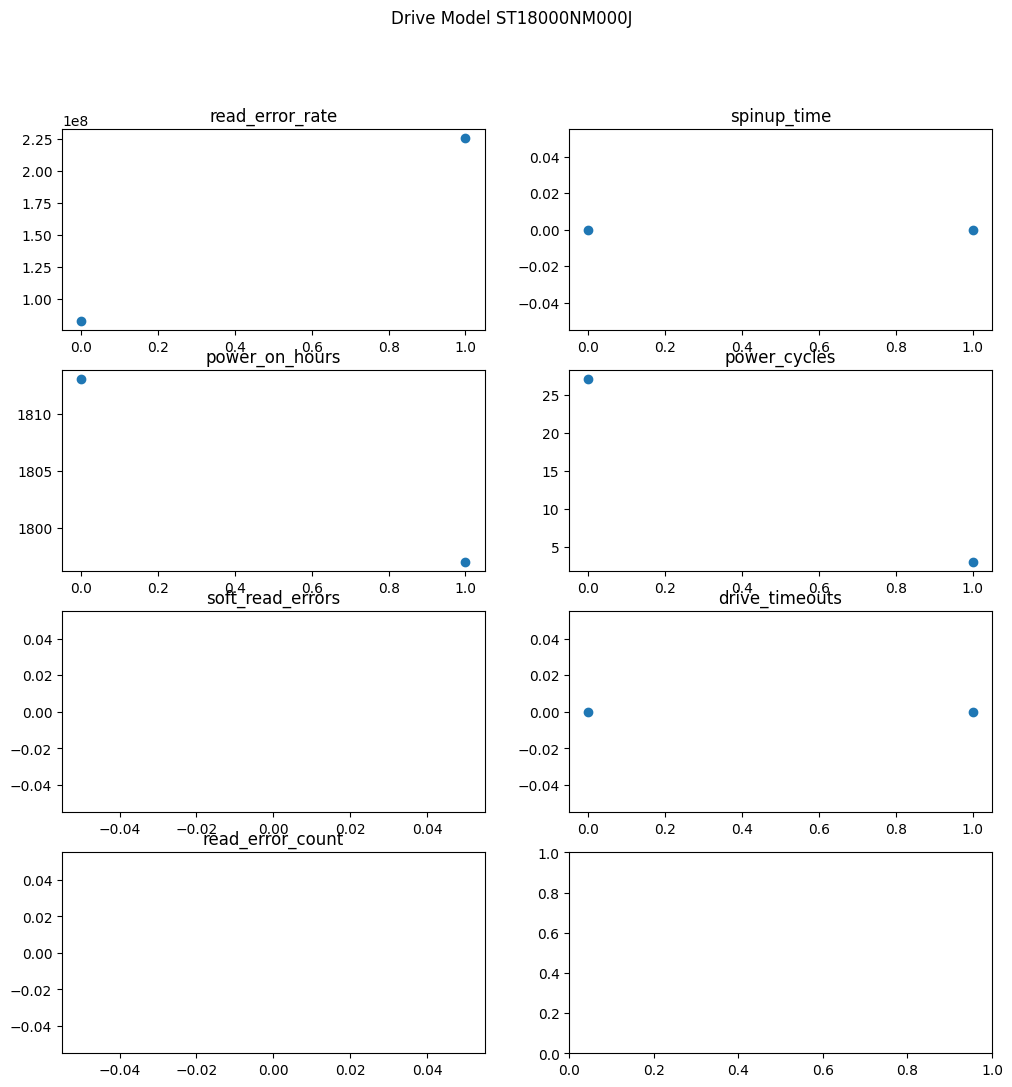

Drive Model: ST4000DM000


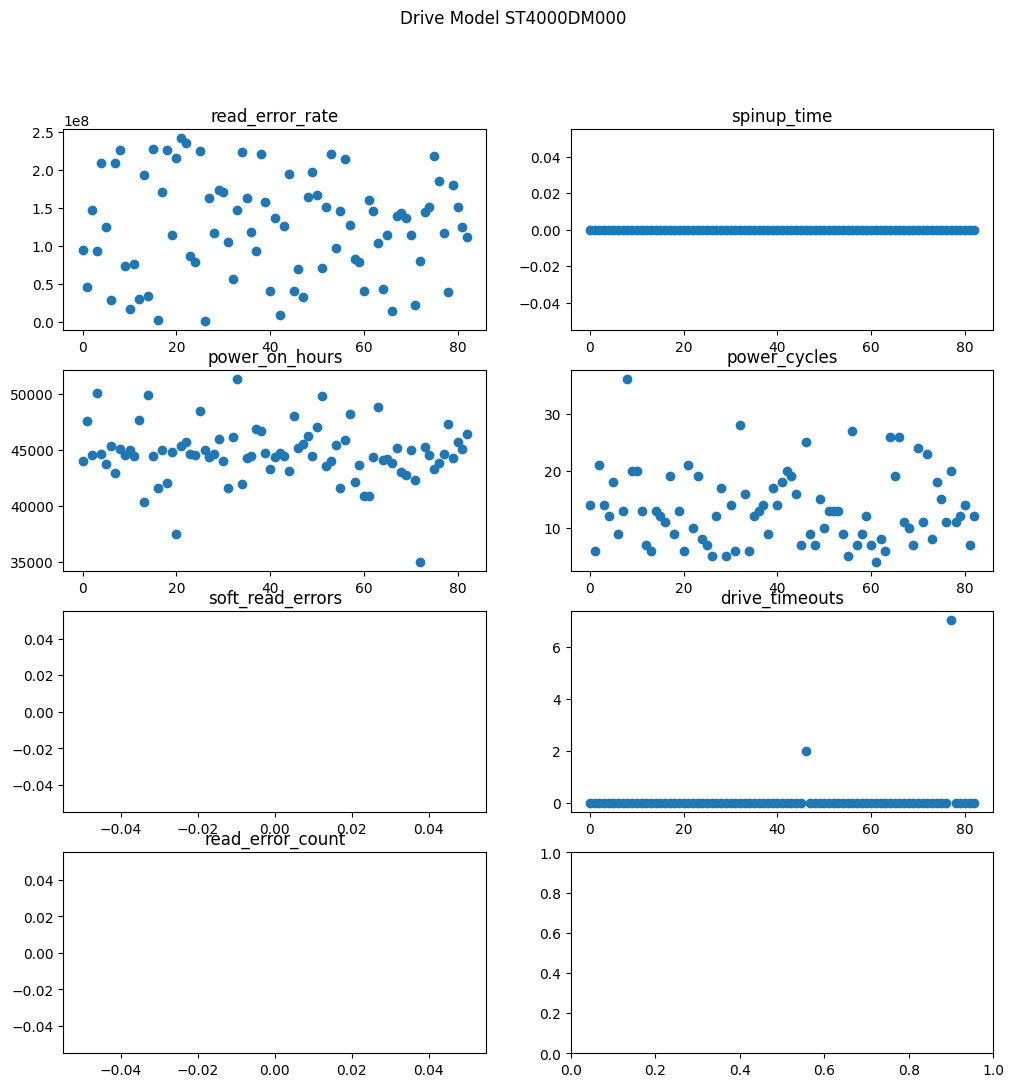

Drive Model: ST500LM012 HN


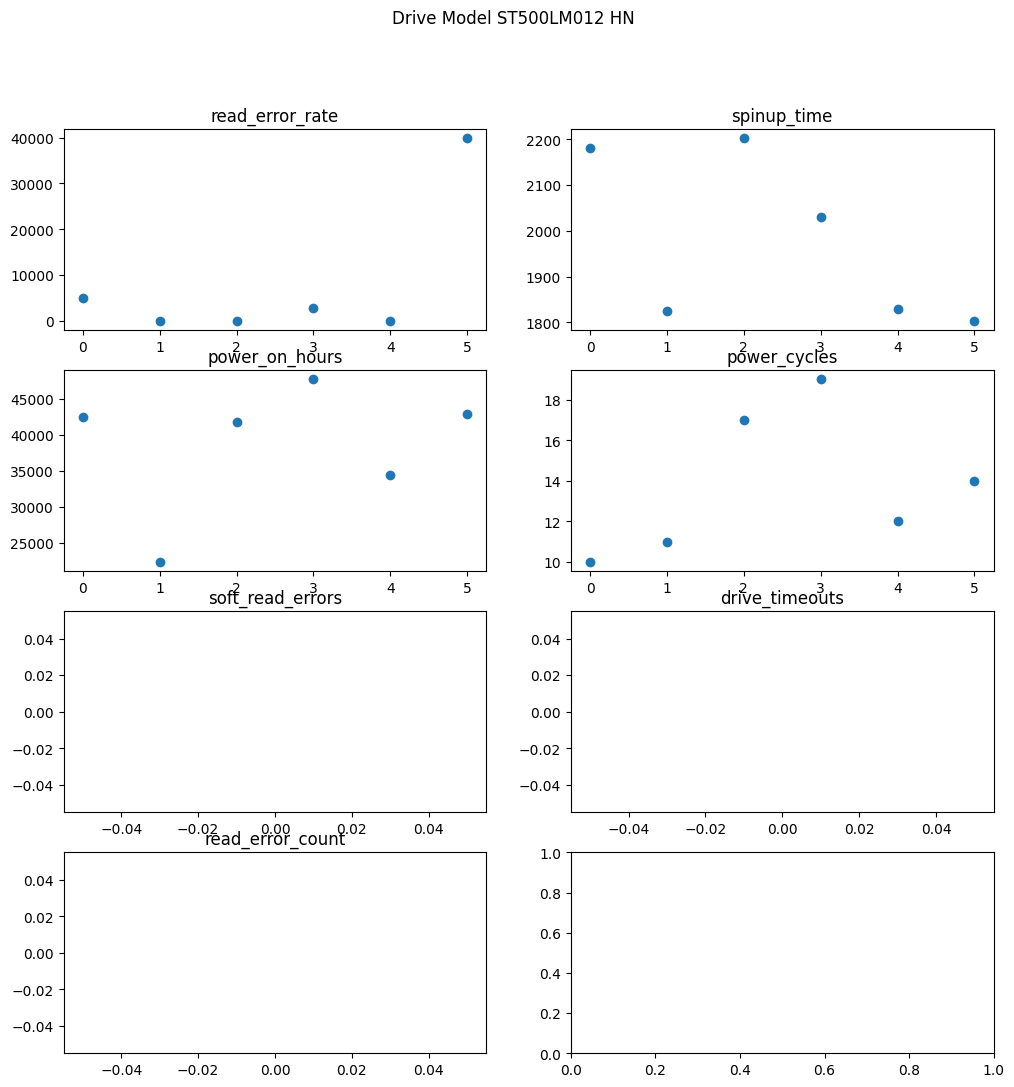

Drive Model: ST8000DM002


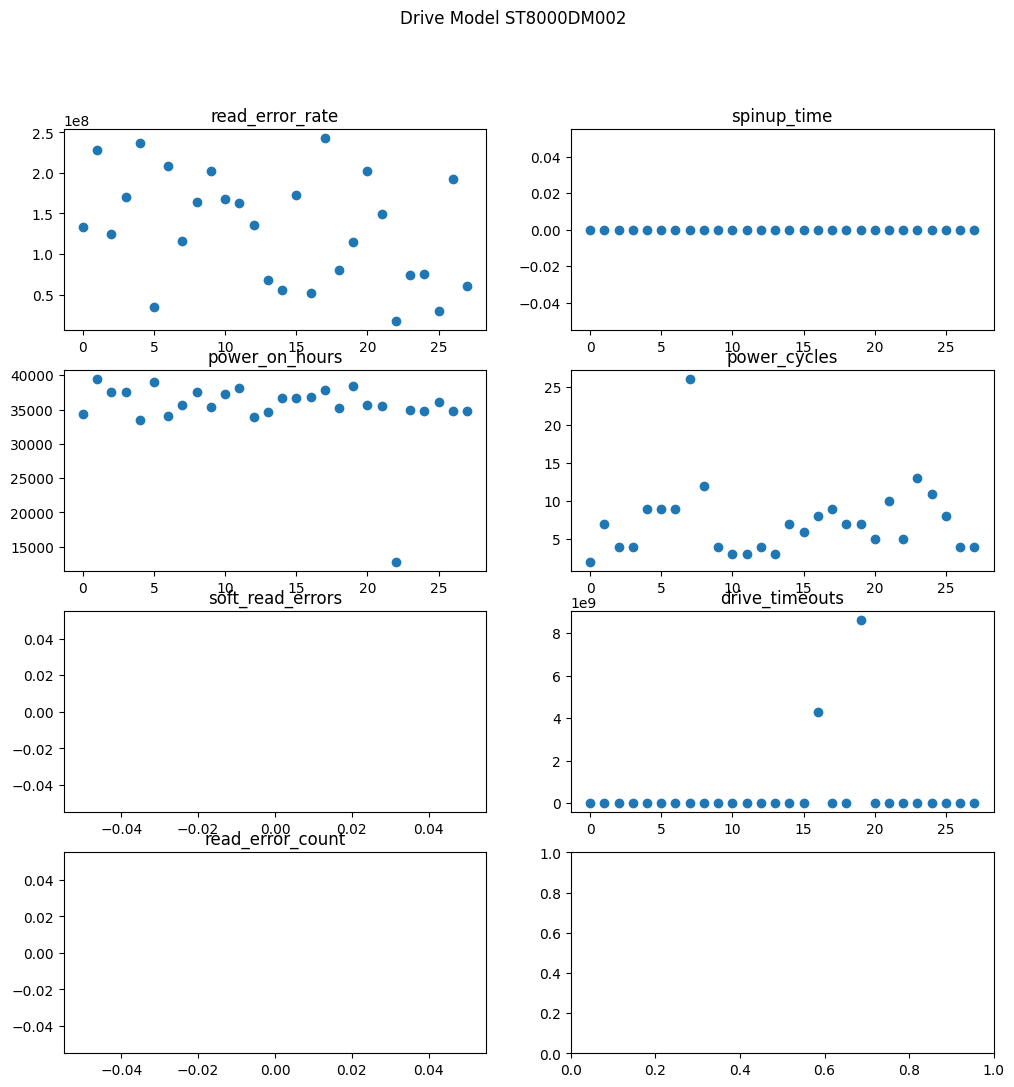

Drive Model: ST8000NM0055


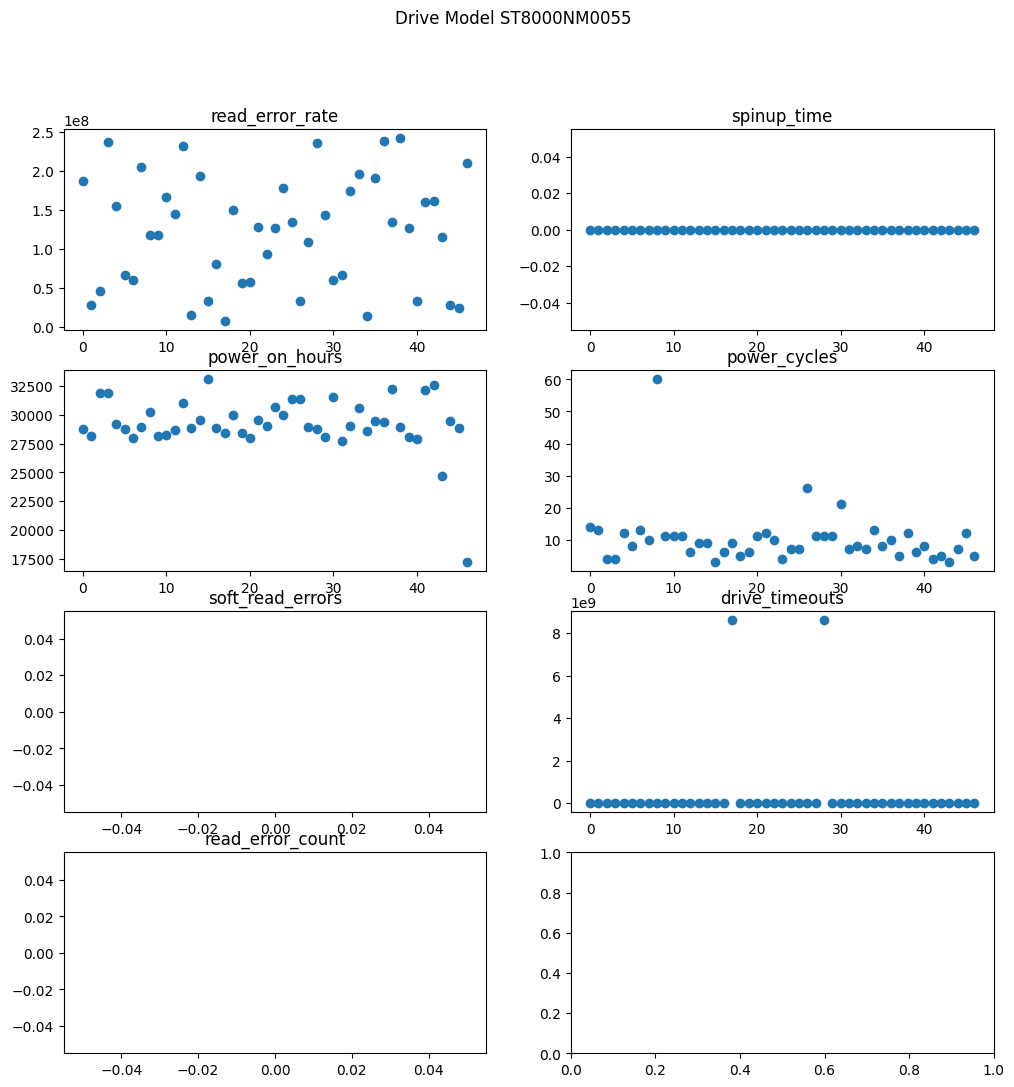

Drive Model: Seagate SSD


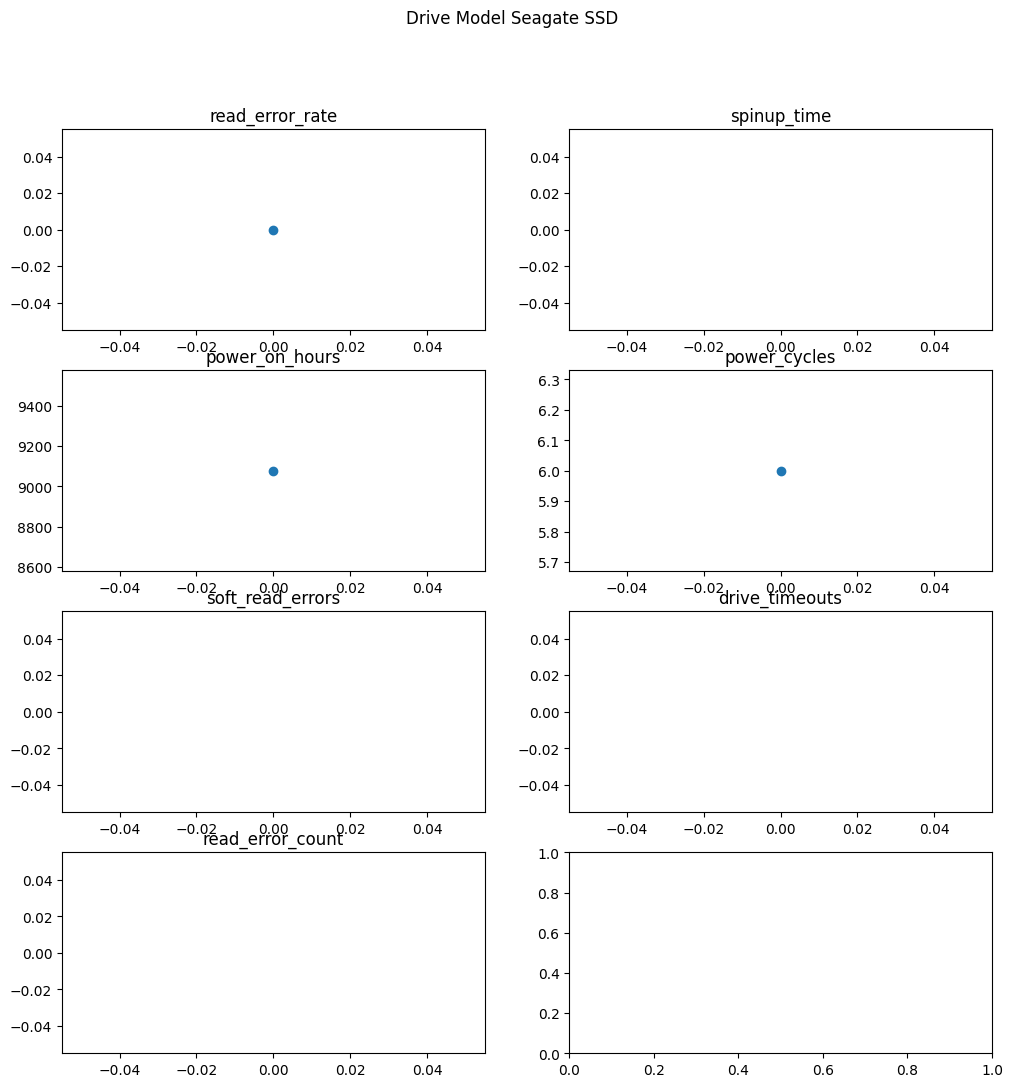

Drive Model: TOSHIBA MG07ACA14TA


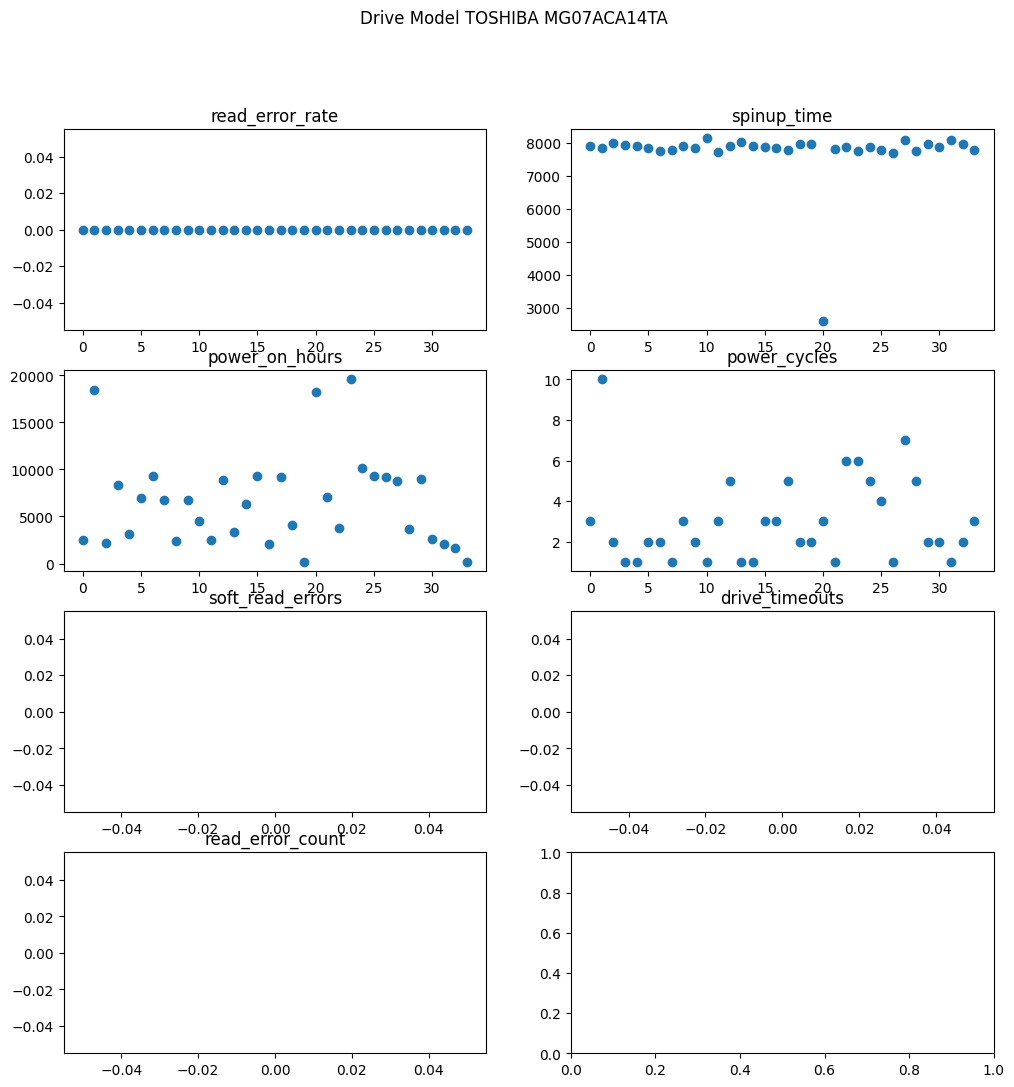

Drive Model: TOSHIBA MQ01ABF050


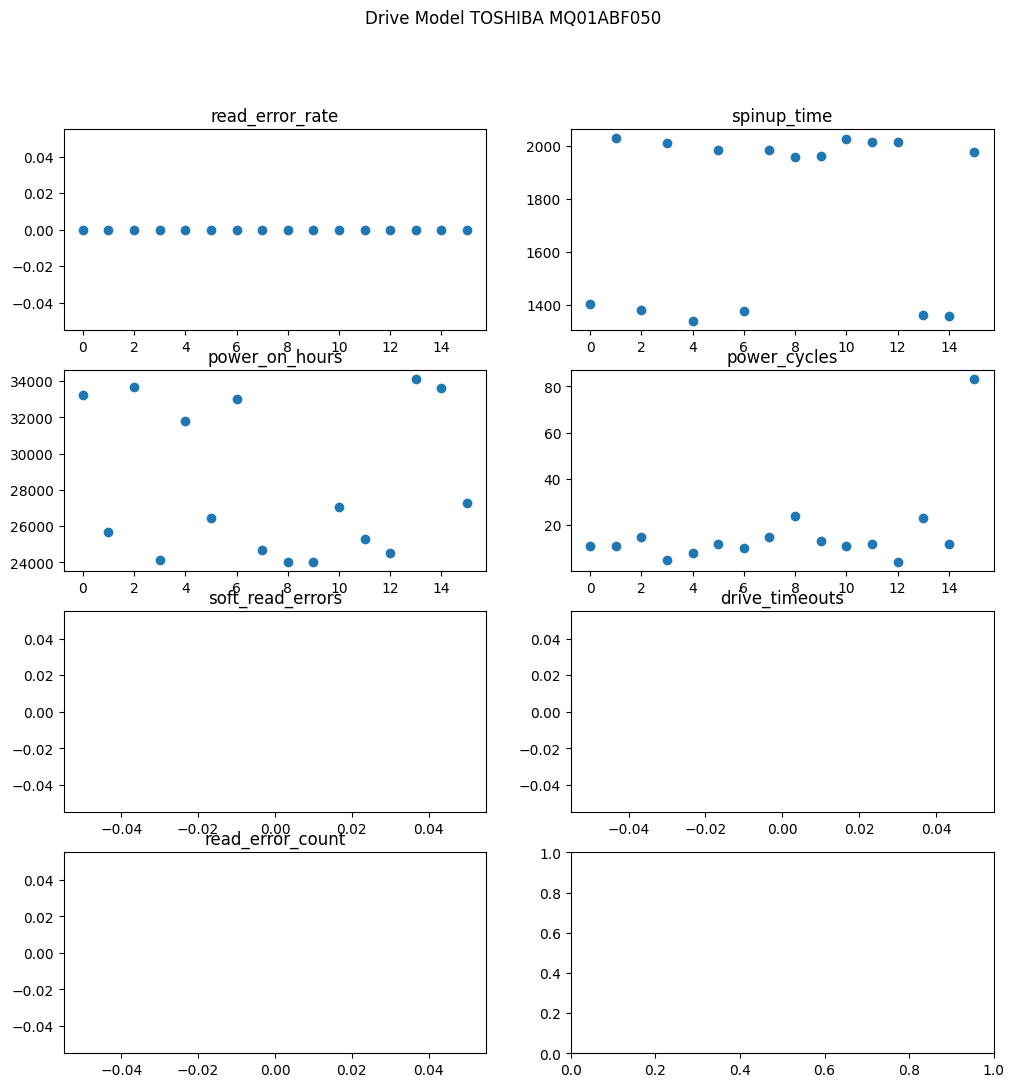

Drive Model: TOSHIBA MQ01ABF050M


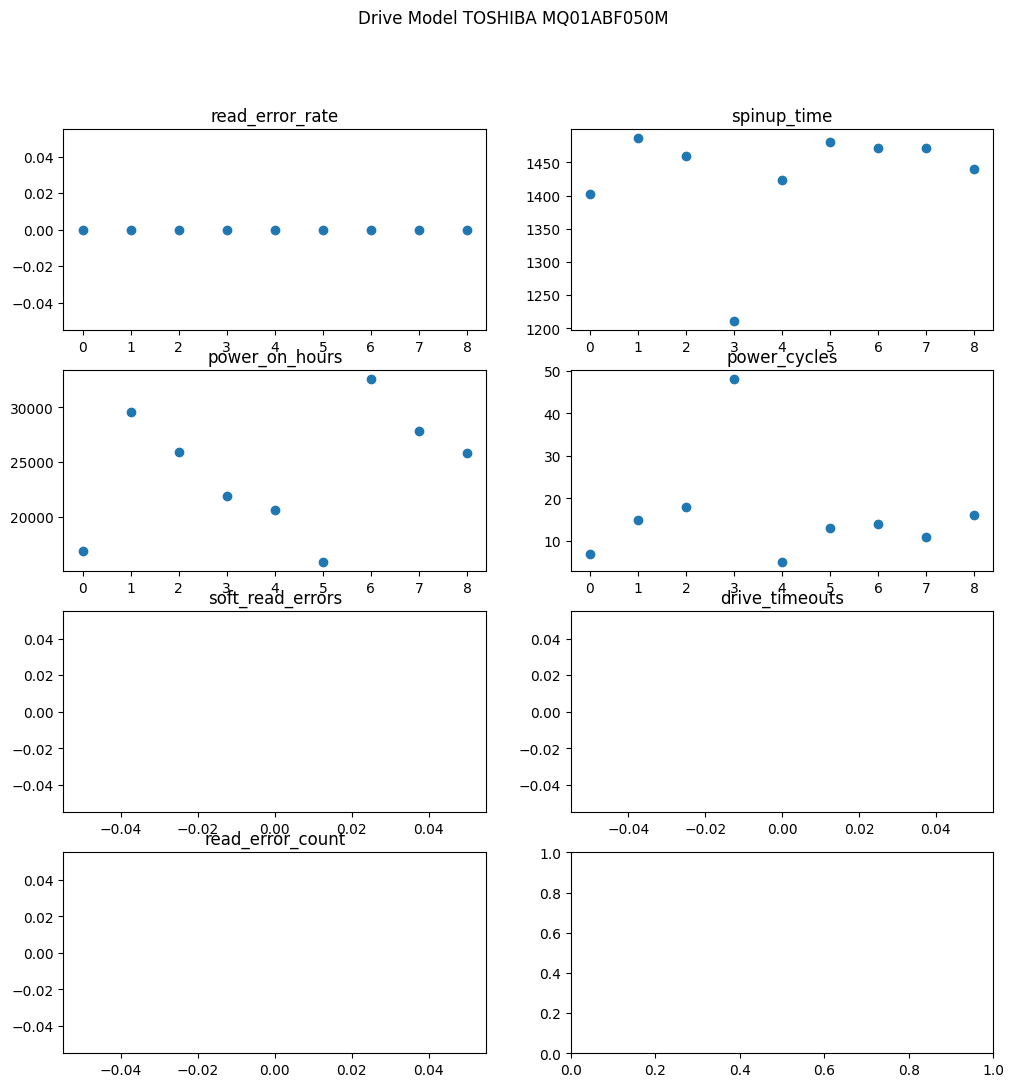

Drive Model: WDC WUH721414ALE6L4


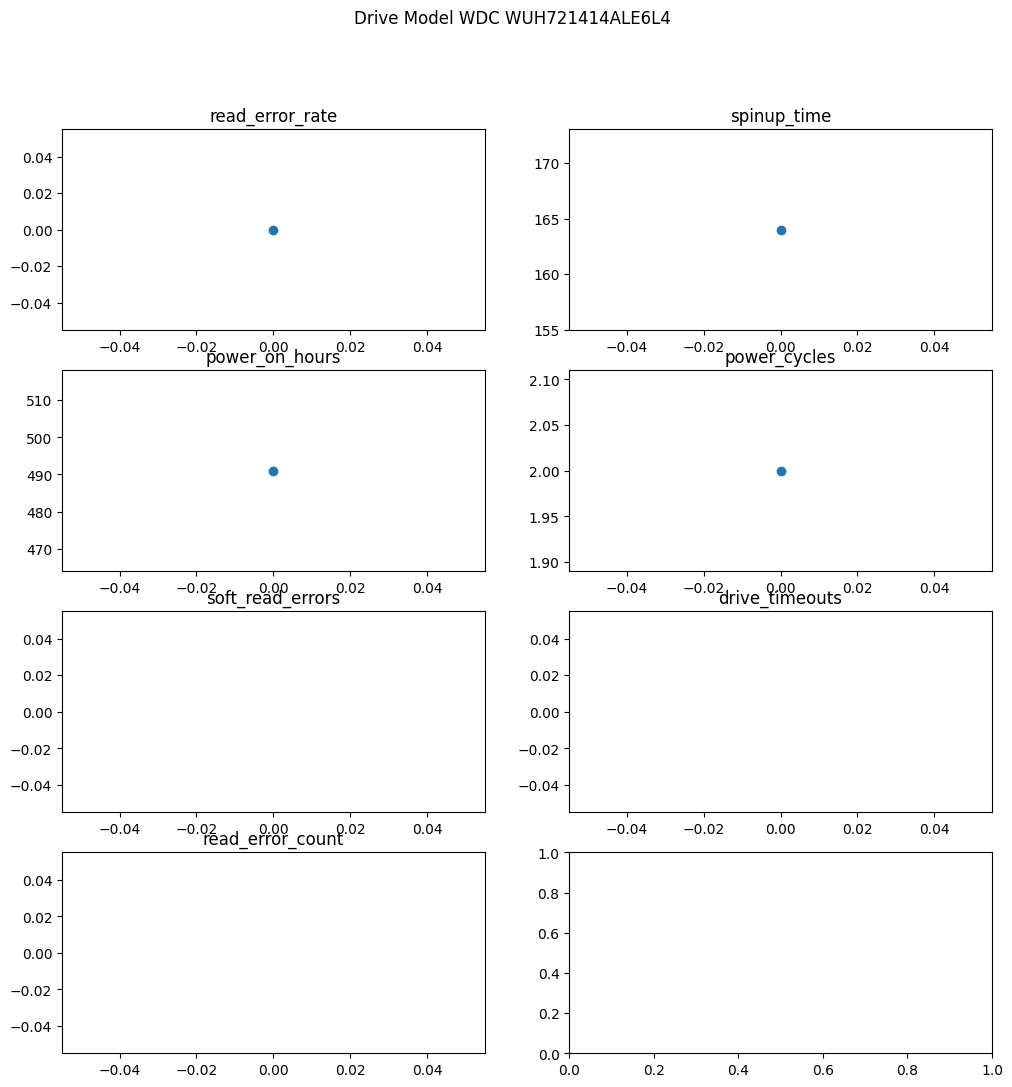

In [16]:
def status_graphs(model, drive_data, raw=0):
    columns = cols.copy()
    del columns['failure_status']
    (fig, axes) = plt.subplots(4,2,figsize=(12,12))
    plots = axes.flatten()
    plot_index = 0
    fig.suptitle(f'Drive Model {model}')
    for legend, column in columns.items():
        plots[plot_index].scatter(range(len(drive_data)),drive_data[:,column+raw])
        plots[plot_index].set_title(legend)
        plot_index = plot_index + 1
    plt.show()
    
drive_models = np.unique(failed_drives[:,2])
for model in drive_models:
    print(f'Drive Model: {model}')
    status_graphs(model, failed_drives[np.where(failed_drives[:,2]==model)], raw=1)

Of all of these, the read error rate seem pretty interesting.  There are other parameters that seem as though they might be significant as well, but let's look at just this one.

Let's find the average and the median values.

# <img src="../images/task.png" width=20 height=20> Task 1.12

This task is multifaceted.

1. Produce the average and median raw read error rate by drive model.
2. Plot these in a bar chart.
3. Determine the overall average and median read error rate for failed drives.
4. Reprocess the CSV files.  Produce an overall average and median for read error rates for all drives for which there is at least one failed drive by model number.

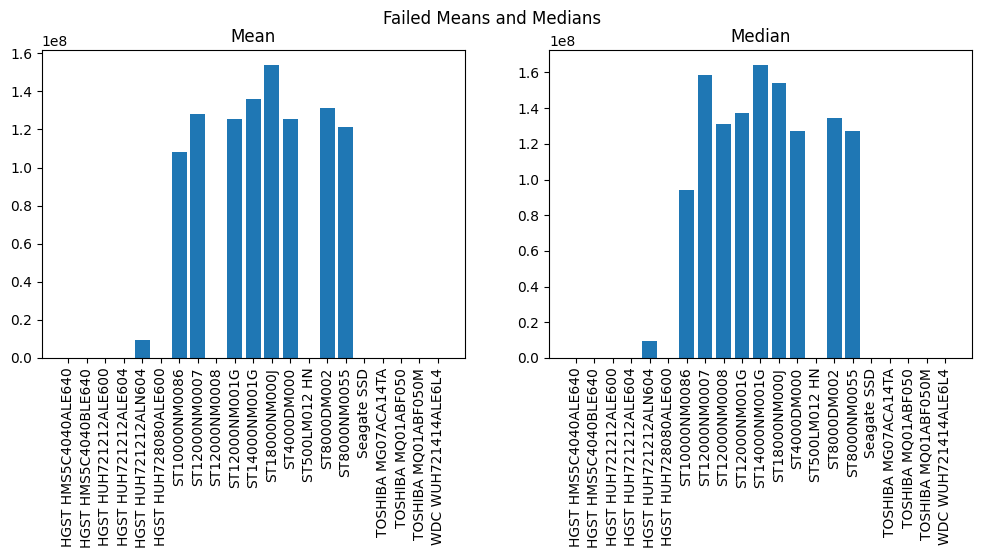

In [ ]:
def stats_graphs(title, means, medians):
    (fig, axes) = plt.subplots(1,2,figsize=(12,4))
    plots = axes.flatten()
    fig.suptitle(f'{title} Means and Medians')
    plots[0].bar(range(len(means.values())),means.values())
    plots[0].set_title("Mean")
    plots[0].set_xticks(range(len(means)))
    plots[0].set_xticklabels(means.keys(), rotation=90)
    plots[1].bar(range(len(medians.values())),medians.values())
    plots[1].set_title("Median")
    plots[1].set_xticks(range(len(means)))
    plots[1].set_xticklabels(medians.keys(), rotation=90)
    plt.show()

drive_models = np.unique(failed_drives[:,2])
failed_medians = dict()
failed_means = dict()
for model in drive_models:
    failed_medians[model] = np.median(failed_drives[np.where(failed_drives[:,2]==model),6])
    failed_means[model] = np.mean(failed_drives[np.where(failed_drives[:,2]==model),6])

stats_graphs("Failed", failed_means, failed_medians)
all_drives = np.array([])
for file in all_files:
    df = pd.read_csv(file, usecols=['model', 'failure','smart_1_raw'])
    these_rows = df.to_numpy()
    all_drives = these_rows if all_drives.size == 0 else np.vstack((all_drives, these_rows))

all_medians = dict()
all_means = dict()
for model in drive_models:
    all_medians[model] = np.median(all_drives[np.where(all_drives[:,0]==model),2])
    all_means[model] = np.mean(all_drives[np.where(all_drives[:,0]==model),2])
stats_graphs("All Drives", all_means, all_medians)

That does seem promising!  Notice that in several cases the mean and the median values are very different.  For example, the mean for one type of failed drive comes out to nearly zero, while the median has something measurable.  Similarly, some of the medians are lower than some of the means.  This demonstrates the robustness of these measures.

We can see from the comparison of all drives to failed drives only that, while there are read failures measured for most drives, values greater than $1.2\times10^8$ seem to indicate that a failure will occur.  If you wish to go further, you could graph the read errors over time for each model number.  The new hypothesis would be that the read errors grow over time and that the drives that have error rates approaching $1.2\times10^8$ are more likely to fail than the other drives.

Of course, there is a lot more data here.  We'll look at other methods that are better for understanding what's happening in this data later in our course.

## Conclusion

This lab has given us the opportunity to work with Pandas dataframes a bit more, in addition to handling large amounts of data split across multiple files.  We took the time to put some of our Matplotlib experience to work, and finally explored some fundamental statistics operations.

We will return to this BackBlaze data later in the course.
